
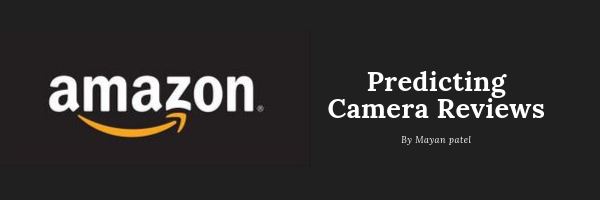

* [Import data](#data)
* [Initial analysis](#firstlook)
    * [UK Dataset](#ukdata)
    * [US Dataset](#usdata)
* [Cleaning](#cleaning)
    * [Remove unnecessary features](#dropfeatures)
    * [Missing values](#missingvalues)
    * [Duplicate reviews](#duplicates)
    * [Data types](#datatypes)
    * [Unique values](#unique)
    * [Outiers](#outliers)
* [Feature engineering](#feature_engineering)
    * [Helpful vote ratio](#helpfulvote)
    * [Review length (words)](#reviewlength)
    * [Camera brand](#brand)
    * [Review sentiment](#reviewsentiment)
* [EDA](#eda)
    * [Time period trends](#time)
    * [Product insights](#producteda)
    * [Helpfulness](#helpfuleda)
    * [Review length](#reviewlengtheda)
    * [Verified purchases](#verifiededa)
    * [Text analysis](#texteda)
    * [Reviewer behaviour](#reviewers)
    * [Correlation heatmap](#correlationheatmap)
* [Web Scraping for current reviews)](#scraping)
    * [Product scraper](#productscraper)
    * [Review scraper](#reviewscraper)
* [Modelling](#modelling)
    * [Baseline accuracy score](#baseline)
    * [Review body as only feature](#reviewbodyonly)
        * [Logistic Regression w/ count Vectoriser](#logregonefeatcvec)
        * [Logistic regression TFIDF](#logregonefeat)
        * [Multinomial Naive Bayes](#nbonefeat)
        * [Random Forest](#randforestonefeat)
        * [Gradient Boosting](#gradboostonefeat)
        * [KNeighborsClassifier](#knnonefeat)
        * [SVM: Support Vector Classifier](#svmonefeat)
    *  [Random Forest only sentiment features](#sentimentforest)
    * [Modelling with multiple features](#morefeatures) 
        * [Results comparison](#morefeaturescomparison)
    * [Binary classification problem](#binaryclassification)
    * [Conclusions](#conclusions)
        
       
 
 
     



<a name="data"> </a>
# Import Data and packages


In [251]:
#Download datasets into local folder
#!curl https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_UK_v1_00.tsv.gz > amazon_reviews.tsv.gz
#!curl https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Camera_v1_00.tsv.gz > amazon_reviews_us_.tsv.gz

In [84]:
#Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

#Visualisation
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

#Web Scraping
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
import random
from collections import Counter

#Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Natural Language Processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from scipy import sparse
from scipy.sparse import hstack
#import textacy
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction import DictVectorizer

#Preprocessing and metrics
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer


from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#Imbalanced learn 

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import Pipeline as pipeline_imb


In [254]:
#Amazon US and UK Dataset

#df_uk = pd.read_csv("amazon_review_datasets.tsv/amazon_reviews.tsv", delimiter='\t', error_bad_lines=False)
df_us = pd.read_csv("amazon_review_datasets/amazon_reviews_us.tsv", delimiter='\t', error_bad_lines=False)


b'Skipping line 85458: expected 15 fields, saw 22\nSkipping line 91161: expected 15 fields, saw 22\n'
b'Skipping line 166123: expected 15 fields, saw 22\n'
b'Skipping line 225458: expected 15 fields, saw 22\nSkipping line 229936: expected 15 fields, saw 22\nSkipping line 259297: expected 15 fields, saw 22\n'
b'Skipping line 284728: expected 15 fields, saw 22\nSkipping line 286334: expected 15 fields, saw 22\nSkipping line 293400: expected 15 fields, saw 22\nSkipping line 294415: expected 15 fields, saw 22\nSkipping line 308150: expected 15 fields, saw 22\nSkipping line 315022: expected 15 fields, saw 22\nSkipping line 315730: expected 15 fields, saw 22\nSkipping line 316071: expected 15 fields, saw 22\nSkipping line 326729: expected 15 fields, saw 22\n'
b'Skipping line 329101: expected 15 fields, saw 22\nSkipping line 333077: expected 15 fields, saw 22\nSkipping line 377031: expected 15 fields, saw 22\nSkipping line 389496: expected 15 fields, saw 22\nSkipping line 390486: expected 15 

<a name="firstlook"> </a>
# Initial analysis

<a name="ukdata"> </a>
## UK Dataset



In [4]:
df_uk.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,UK,10349,R2YVNBBMXD8KVJ,B00MWK7BWG,307651059,My Favourite Faded Fantasy,Music,5,0,0,N,Y,Five Stars,The best album ever!,2014-12-29
1,UK,10629,R2K4BOL8MN1TTY,B006CHML4I,835010224,Seiko 5 Men's Automatic Watch with Black Dial ...,Watches,4,0,0,N,Y,Great watch from casio.,What a great watch. Both watches and strap is ...,2013-10-24
2,UK,12136,R3P40IEALROVCH,B00IIFCJX0,271687675,Dexter Season 8,Digital_Video_Download,5,0,0,N,Y,fantastic,"love watching all the episodes of Dexter, when...",2014-05-09
3,UK,12268,R25XL1WWYRDLA9,B000W7JWUA,211383699,The Settlers of Catan Board Game - discontinue...,Toys,5,0,0,N,Y,Five Stars,Excellent game!!!,2014-09-19
4,UK,12677,RVTVB9YDXSFYH,B005JTAP4S,182965893,Peter: A Darkened Fairytale (Vol 1),Digital_Ebook_Purchase,5,12,12,N,N,A twist on Tales,"This cute, quick read is very different to say...",2013-09-18


In [5]:
#UK dataset consists of multiple categories bundled together. Camera category has 6427 camera reviews
df_uk.product_category.value_counts()

Video DVD                   463202
Music                       329868
Digital_Ebook_Purchase      289120
Books                       257804
Mobile_Apps                 218037
Digital_Video_Download       31423
Digital_Music_Purchase       29264
Toys                         24496
PC                           16258
Camera                        6427
Electronics                   5846
Wireless                      5593
Video                         4580
Baby                          4328
Video Games                   3592
Watches                       3101
Musical Instruments           2832
Home                          2690
Sports                        2336
Shoes                         1718
Office Products                984
Home Improvement               950
Automotive                     530
Health & Personal Care         246
Lawn and Garden                240
Home Entertainment             117
Personal_Care_Appliances       100
Software                        77
Pet Products        

In [6]:
#Set category to Camera in UK Dataset
df_uk = df_uk[df_uk['product_category'] == "Camera"]
df_uk.shape

(6427, 15)

In [8]:
#Search for camera bodies in the UK dataset
body_only_uk = df_uk[df_uk['product_title'].str.contains('[Bb]ody', regex=True) ]

In [9]:
#Too few results. Conclusion: This dataset is unusable for my purposes
body_only_uk.shape 

(30, 15)

<a name="usdata"> </a>
## US Dataset

In [255]:
#US Dataset consists of only the camera category
df_us.product_category.value_counts()

Camera    1800845
Name: product_category, dtype: int64

In [256]:
df_us.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,N,Y,Five Stars,ok,2015-08-31
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,N,Y,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,N,Y,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,N,Y,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,N,Y,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31


In [259]:
#Product search example using ASIN
# df_us[df_us['product_id'] == "B079GDB7C7"] 

#Filter by Brand
#brands = df_us[df_us['product_title'].str.contains('[Ss]ony|[Cc]anon|[Pp]anasonic|[Ss]amsung|[Ff]ujifilm|[Nn]ikon|[Kk]odak|[Oo]lympus|[Cc]asio|[Kk]onica Minolta|[Pp]entax|[Ll]eica|[Rr]icoh', regex=True) ]


In [257]:
#To filter actual cameras out of all camera related products - searched for "body only" in the title. This is when you buy a camera without a lens.
#4260 reviews


body_only_us = df_us[df_us['product_title'].str.contains('[Bb]ody [Oo]nly', regex=True) ]
len(body_only_us)


4260

In [258]:
#Example of these reviews? Are they cameras. Looks like it yes!

body_only_us['product_title'].values[:10]

array(['Sony a7R II Full-Frame Mirrorless Interchangeable Lens Camera, Body Only (Black) (ILCE7RM2/B)',
       'Nikon D750 DSLR Camera (Body Only) + 32GB Extreme Pro Memory Card + Extra Battery and Charger',
       'Sony a7R II Full-Frame Mirrorless Interchangeable Lens Camera, Body Only (Black) (ILCE7RM2/B)',
       'Canon EOS 7D Mark II Digital SLR Camera (Body Only) with Canon Battery Grip BG-E16 and 64GB Deluxe Accessory Kit',
       'Olympus OM-G OMG OM-20 Manual Focus Film Camera; Body Only',
       'Sony a7R II Full-Frame Mirrorless Interchangeable Lens Camera, Body Only (Black) (ILCE7RM2/B)',
       'Sigma SD14 14MP Digital SLR Camera (Body Only)',
       'Nikon D3200 24.2 MP Digital SLR Camera (Body Only) - International Version (No Warranty) (Black, Open Box)',
       'Nikon D3300 24.2 MP CMOS Digital SLR Body Only (Grey) - International Version (No Warranty)',
       'Minolta SRT-101 35mm SLR film camera body only; lens is not included.'],
      dtype=object)

<a name="cleaning"> </a>
# Cleaning

In [259]:
#Continuing with the US dataset camera subset. Check first few reviews
print("Observations",body_only_us.shape)
body_only_us.head()

Observations (4260, 15)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
262,US,30739283,R190J2PDOZ5GVK,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,Camera,3,36,51,N,Y,"Great camera, but there are shortcomings","Great camera, but there are shortcomings : -4...",2015-08-31
917,US,15760475,R3SGZ5G1GJAWVU,B00TSR7YPK,515216474,Nikon D750 DSLR Camera (Body Only) + 32GB Extr...,Camera,5,1,1,N,Y,"This camera is amazing, I have a d610 that I r...","This camera is amazing, I have a d610 that I r...",2015-08-31
1282,US,10861723,R3BWM499VCMGS7,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,Camera,5,48,52,N,Y,Absolutly Must have camera,"Im a Canon guy, but as soon as I found out thi...",2015-08-31
3287,US,22343417,R3SMKIWNMR55UB,B00O29LKN6,474362814,Canon EOS 7D Mark II Digital SLR Camera (Body ...,Camera,5,0,0,N,Y,Canon Digital,I read several review's before my purchase. T...,2015-08-29
4855,US,106593,RNBM8M0T11BV0,B009F2OUOQ,968361935,Olympus OM-G OMG OM-20 Manual Focus Film Camer...,Camera,1,3,3,N,Y,This is only for the camera and strap. There ...,This is only for the camera and strap. There i...,2015-08-29


In [10]:
#Observing unverfied purchases at the tail of the dataset
body_only_us.tail()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1800384,US,50475059,R39BUDCLVS7C1W,B00001ZUNQ,830638546,Nikon N60 35mm SLR Camera (Body only),Camera,5,51,55,N,N,NIKON N60 SLR CAMERA,I JUST LOVE MY NEW NIKON N60 SLR CAMERA. WHIL...,2000-01-15
1800443,US,50827136,R2RIUKRW8T3CGW,B00001ZUNQ,830638546,Nikon N60 35mm SLR Camera (Body only),Camera,1,28,57,N,N,N60 lacks features,I was disappointed with the N60. It is a very ...,2000-01-05
1800469,US,50369588,R1D2EW0PL916O9,B00001ZUNQ,830638546,Nikon N60 35mm SLR Camera (Body only),Camera,5,52,54,N,N,Wonderful Pictures,I've owned my Nikon N-60 for about a year now ...,1999-12-30
1800607,US,52003068,R3QVXNRR0AT2RG,B00001ZUNQ,830638546,Nikon N60 35mm SLR Camera (Body only),Camera,5,85,90,N,N,Great Entry Level SLR,I have had the N60 for about 4 months and I ha...,1999-12-01
1800648,US,52637682,R4FVH4JC8X39I,B00001ZUNQ,830638546,Nikon N60 35mm SLR Camera (Body only),Camera,5,116,121,N,N,N60 is a perfect entry level SLR,An excellent choice for anyone looking for an ...,1999-11-23


<a name="dropfeatures"> </a>
## Remove unnecessary features 

In [260]:
#Value counts for these columns only contain one value. Removing as no extra information added.

body_only_us.marketplace.value_counts() #Marketplace: US
body_only_us.product_category.value_counts() #Product Category: Camera
body_only_us.vine.value_counts()  #Vine: N

#Drop all three columns
body_only_us.drop('marketplace', axis=1, inplace=True)  
body_only_us.drop('product_category', axis=1, inplace=True)  
body_only_us.drop('vine', axis=1, inplace=True)  

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<a name="missingvalues"> </a>
## Missing Values

In [261]:
#No missing values
body_only_us.isnull().sum()

customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
star_rating          0
helpful_votes        0
total_votes          0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

<a name="duplicates"> </a>
## Duplicate Reviews

In [262]:
# No duplicate reviews to remove
body_only_us[body_only_us.duplicated()]

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,review_date


In [15]:
body_only_us.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_headline,review_body,review_date
262,30739283,R190J2PDOZ5GVK,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,3,36,51,Y,"Great camera, but there are shortcomings","Great camera, but there are shortcomings : -4...",2015-08-31
917,15760475,R3SGZ5G1GJAWVU,B00TSR7YPK,515216474,Nikon D750 DSLR Camera (Body Only) + 32GB Extr...,5,1,1,Y,"This camera is amazing, I have a d610 that I r...","This camera is amazing, I have a d610 that I r...",2015-08-31
1282,10861723,R3BWM499VCMGS7,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,5,48,52,Y,Absolutly Must have camera,"Im a Canon guy, but as soon as I found out thi...",2015-08-31
3287,22343417,R3SMKIWNMR55UB,B00O29LKN6,474362814,Canon EOS 7D Mark II Digital SLR Camera (Body ...,5,0,0,Y,Canon Digital,I read several review's before my purchase. T...,2015-08-29
4855,106593,RNBM8M0T11BV0,B009F2OUOQ,968361935,Olympus OM-G OMG OM-20 Manual Focus Film Camer...,1,3,3,Y,This is only for the camera and strap. There ...,This is only for the camera and strap. There i...,2015-08-29


<a name="datatypes"> </a>
## Data types

In [263]:
# Convert Review_date to datetime. Other feature data types as expected
body_only_us["review_date"] = pd.to_datetime(body_only_us["review_date"])

body_only_us.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 262 to 1800648
Data columns (total 12 columns):
customer_id          4260 non-null int64
review_id            4260 non-null object
product_id           4260 non-null object
product_parent       4260 non-null int64
product_title        4260 non-null object
star_rating          4260 non-null int64
helpful_votes        4260 non-null int64
total_votes          4260 non-null int64
verified_purchase    4260 non-null object
review_headline      4260 non-null object
review_body          4260 non-null object
review_date          4260 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 432.7+ KB


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<a name="unique"> </a>
## Unique Values

In [264]:
# Unique value counts

#4620 reviews
print(body_only_us.review_id.value_counts())
print("- - - - - - - - - - ")
# 405 total unique products
print(body_only_us.product_parent.value_counts())
print("- - - - - - - - - - ")
# 2701 verified_purchases and 1559 non verified
print(body_only_us.verified_purchase.value_counts())


R3CVZT2NWUM9KS    1
R1NLP6LRFJ74Y9    1
R1SWX3EO8X9DJV    1
R3RO4U7AC4YK9F    1
RDVT0A8GZQEOI     1
                 ..
R138D2YXYSCQJU    1
R94UY8QIQIIDC     1
R1E6Y14K7TL4OX    1
RP6TB67Z1WUSM     1
R2WDQIL8TEH204    1
Name: review_id, Length: 4260, dtype: int64
- - - - - - - - - - 
804173116    609
779649401    207
454013378    152
5388726      112
627328355    100
            ... 
397935029      1
377276836      1
603661542      1
681360689      1
807106454      1
Name: product_parent, Length: 405, dtype: int64
- - - - - - - - - - 
Y    2701
N    1559
Name: verified_purchase, dtype: int64


<a name="outliers"> </a>
## Outliers

In [265]:
#Numeric columns
body_only_us[['star_rating', 'helpful_votes','total_votes']].describe()

#Star Rating 
#Ranges from 1-5 as expected. Mean rating 4.43 stars and median of 5. This is very high!

#Helpful Votes 
#8.9 mean average per review. 
#Median of 2. Skewed as some reviews may have many helpful votes.. Max is 1310 (which review was this? check below)

#Total votes
#average 12 per review. Again likely to be skewed as there is a review with max votes 1357


,star_rating,helpful_votes,total_votes
count,4260.000000,4260.000000,4260.000000
mean,4.439202,8.949061,12.359859
std,1.090768,35.633640,40.687948
min,1.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000
50%,5.000000,2.000000,3.000000
75%,5.000000,6.000000,9.000000
max,5.000000,1310.000000,1357.000000


In [266]:
#Review with most helpful votes. Looks legitimate and detailed. 

body_only_us[body_only_us['helpful_votes']>1000]
print(body_only_us[body_only_us['review_id'] == 'R21UDHF662K69V']['review_headline'].values)
print(body_only_us[body_only_us['review_id'] == 'R21UDHF662K69V']['review_body'].values)

['Does the 7D beat full frame cameras?']
["No, but it's so good that one starts to contemplate this question, which was never the case before the 7D was introduced. Both systems, crop and full frame, have their pros and cons and place in photography. But before I get into that let me say I have not been as excited about a camera since the introduction of the 5D MK I four years ago. That's because the 7D raises the crop camera bar to the point where crop users will not feel at a disadvantage to full frame camera users, especially if coupled with awesome ef-s lenses such as the 17-55 f2.8.<br /><br />How so? The 7D sets a new standard in four major ways.<br /><br />1. It produces whopping 18MP pictures, which are just 3MP shy of the current top of the line full frame Canon cameras. Just few years ago most pros were producing stellar results using the 1Ds MKII 16MP camera. Now you have more MPs in a crop sensor, that's a major achievement. This achievement translates into bigger prints an

## Cleaned DataFrame

In [267]:
# Rearrange columns
df = body_only_us[['customer_id', 'review_id', 'product_id', 'product_parent',
       'product_title', 'star_rating', 'helpful_votes', 'total_votes',
       'verified_purchase','review_date', 'review_headline', 'review_body']]


In [268]:
df.reset_index(inplace=True, drop=True)
df.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_date,review_headline,review_body
0,30739283,R190J2PDOZ5GVK,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,3,36,51,Y,2015-08-31,"Great camera, but there are shortcomings","Great camera, but there are shortcomings : -4..."
1,15760475,R3SGZ5G1GJAWVU,B00TSR7YPK,515216474,Nikon D750 DSLR Camera (Body Only) + 32GB Extr...,5,1,1,Y,2015-08-31,"This camera is amazing, I have a d610 that I r...","This camera is amazing, I have a d610 that I r..."
2,10861723,R3BWM499VCMGS7,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,5,48,52,Y,2015-08-31,Absolutly Must have camera,"Im a Canon guy, but as soon as I found out thi..."
3,22343417,R3SMKIWNMR55UB,B00O29LKN6,474362814,Canon EOS 7D Mark II Digital SLR Camera (Body ...,5,0,0,Y,2015-08-29,Canon Digital,I read several review's before my purchase. T...
4,106593,RNBM8M0T11BV0,B009F2OUOQ,968361935,Olympus OM-G OMG OM-20 Manual Focus Film Camer...,1,3,3,Y,2015-08-29,This is only for the camera and strap. There ...,This is only for the camera and strap. There i...


<a name="feature_engineering"> </a>
# Feature Engineering


<a name="helpfulvote"> </a>
## Helpful vote to total vote ratio 

In [269]:
#Signals helpfulness score of a review
df['helpful_ratio'] = df['helpful_votes'] / df['total_votes']

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [270]:
#Creates 838 missing values e.g where the total votes = 0
df['helpful_ratio'].isnull().sum()

838

In [276]:
#Fill the missing values with a 0 helpfulness score as 838 observations is relatively large to drop.
# df.helpful_ratio.fillna(0, inplace=True)

#Fill the missing values with the mean helpfulness
df.helpful_ratio.fillna(df.helpful_ratio.mean(), inplace=True)


df.helpful_ratio.isnull().sum()

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

<a name="reviewlength"> </a>
## Review length (words)

In [278]:
# length of review in words. To determine if longer reviews are more helpful or predict higher ratings
df['review_length'] = df['review_body'].apply(lambda x: len(str(x).split(' ')))

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<a name="brand"> </a>
## Camera brand 

In [279]:
#Pull the first word from product title for the camera brand. Clean and group for misspellings

replace_dict = {'silicon':'silicon valley',
                'chrome':'nikon',
                'pentaxistdl':'pentax',
                'pentaxistds2':'pentax',
                'refurbished':'minolta',
               'portable,':'canon',
               '181':'canon',
               '645':'contax',
               'brand':'nikon'}

df['camera_brand'] = df.product_title.map(lambda x: x.split()[0].lower()).replace(replace_dict)

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [280]:
df.camera_brand.value_counts()

canon             1330
nikon             1072
sony               465
olympus            320
pentax             312
panasonic          170
vivitar            162
vangoddy           113
minolta             84
fujifilm            51
leica               50
sigma               36
silicon valley      30
samsung             28
hasselblad          12
polaroid             5
black                3
kodak                3
universal            2
ricoh                2
mamiya               1
ardinbir             1
phoenix              1
toyo                 1
empty                1
lytro                1
contax               1
vixen                1
new                  1
dslrpros             1
Name: camera_brand, dtype: int64

In [281]:
#Investigate unknown brands and clean camera brand column further

# df[df['camera_brand'] == 'phoenix']['product_title'].values 

# "universal" - case not camera - remove observations 1327 1801
# "empty" - empty box  - remove observation 847
# "new" - this is an accessory - remove observation 580
# "black" - remove row for camera case  - other two are film cameras, remove observations 1395 1771
# "ardinbir" - error with a review for accesory photo lamp - remove observation 508

#findings
df.drop([1327 , 1801, 321, 847, 580, 1395, 1771, 508],inplace=True)


df['camera_brand'].value_counts() 



canon             1330
nikon             1072
sony               465
olympus            320
pentax             312
panasonic          170
vivitar            162
vangoddy           113
minolta             84
fujifilm            51
leica               50
sigma               36
silicon valley      30
samsung             28
hasselblad          12
polaroid             5
kodak                3
ricoh                2
contax               1
dslrpros             1
vixen                1
lytro                1
mamiya               1
phoenix              1
toyo                 1
Name: camera_brand, dtype: int64

<a name="reviewsentiment"> </a>
## Review Sentiment 

In [282]:
#Add VADER sentiment scores based on the review body

analyzer = SentimentIntensityAnalyzer()
vader_scores = df['review_body'].map(analyzer.polarity_scores)
vader_scores.head()

0    {'neg': 0.103, 'neu': 0.768, 'pos': 0.129, 'co...
1    {'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'comp...
2    {'neg': 0.022, 'neu': 0.707, 'pos': 0.271, 'co...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...
Name: review_body, dtype: object

In [283]:
dvec = DictVectorizer()

vader_scores = dvec.fit_transform(vader_scores)
vader_scores

<4252x4 sparse matrix of type '<class 'numpy.float64'>'
	with 17008 stored elements in Compressed Sparse Row format>

In [284]:
dvec.feature_names_

['compound', 'neg', 'neu', 'pos']

In [285]:
for i, col in enumerate(dvec.feature_names_):
    df['vader_{}'.format(col)] = vader_scores[:, i].toarray().ravel()

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
df.head(3)

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_date,review_headline,review_body,helpful_ratio,review_length,camera_brand,vader_compound,vader_neg,vader_neu,vader_pos
0,30739283,R190J2PDOZ5GVK,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,3,36,51,Y,2015-08-31,"Great camera, but there are shortcomings","Great camera, but there are shortcomings : -4...",0.705882,199,sony,0.8964,0.103,0.768,0.129
1,15760475,R3SGZ5G1GJAWVU,B00TSR7YPK,515216474,Nikon D750 DSLR Camera (Body Only) + 32GB Extr...,5,1,1,Y,2015-08-31,"This camera is amazing, I have a d610 that I r...","This camera is amazing, I have a d610 that I r...",1.000000,21,nikon,0.5100,0.000,0.788,0.212
2,10861723,R3BWM499VCMGS7,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,5,48,52,Y,2015-08-31,Absolutly Must have camera,"Im a Canon guy, but as soon as I found out thi...",0.923077,212,sony,0.9967,0.022,0.707,0.271


In [286]:
# Save DataFrame to CSV
df.to_csv(r'cleaned.csv', header=True, index=False)

<a name="eda"> </a>
# EDA 

<a name="time"> </a>
## Time period trends

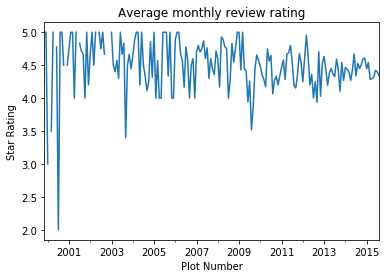

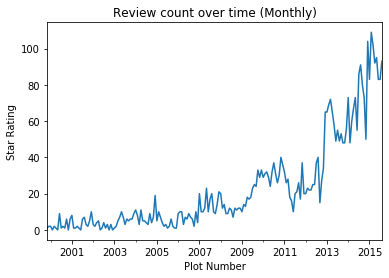

In [287]:
#Down spikes in monthly average review rating during months in 2000, 2004, 2010

df_time = df.copy()
df_time = df_time.set_index('review_date')

df_time.star_rating.resample('M').mean().plot()
# df_time.star_rating.resample('M').median().plot()
plt.xlabel('Plot Number')
plt.ylabel('Star Rating')
plt.title('Average monthly review rating')
plt.savefig("img/time.png", dpi=200, bbox_inches='tight')
plt.show()


df_time.star_rating.resample('M').count().plot()
plt.xlabel('Plot Number')
plt.ylabel('Star Rating')
plt.title('Review count over time (Monthly)')
plt.savefig("img/reviewcounttime.png", dpi=200, bbox_inches='tight')
plt.show()



<a name="producteda"> </a>
## Product insights

In [288]:
# Unique product count
print ("{} unique products in the dataset".format(df.product_parent.nunique()), "\n")

397 unique products in the dataset 



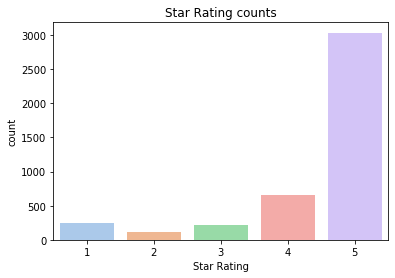

In [289]:
#Most reviews were positive. I wouldn't expect to see so many five star reviews, is this the dataset representative of the marketplace? I will webscrape more reviews to check

fig, ax = plt.subplots() 
sns.countplot(x='star_rating', data=df, palette='pastel')
plt.xlabel('Star Rating')


plt.title('Star Rating counts')
plt.savefig("img/ratings.png", dpi=200, bbox_inches='tight')
plt.show()



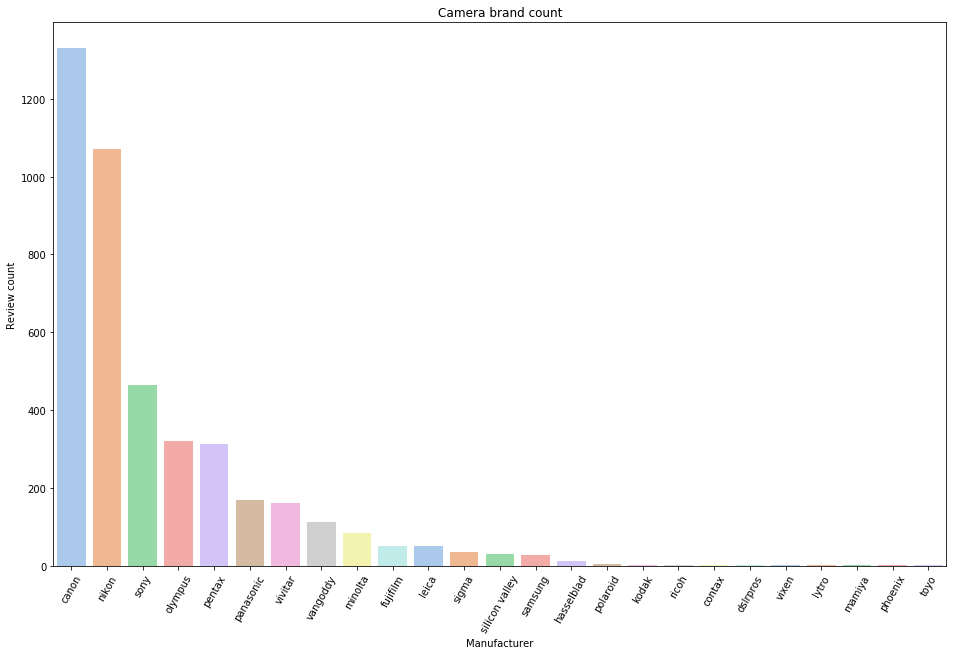

In [290]:
#Canon, Nikon and Sony had the most reviews attributed to them. Expected as they hold the most market share

fig, ax = plt.subplots(figsize=(16,10)) 
sns.countplot(x='camera_brand', data=df, palette='pastel', order=df['camera_brand'].value_counts().index)
plt.xlabel('Manufacturer')
plt.xticks(rotation=60)
plt.ylabel('Review count')



plt.title('Camera brand count')
plt.savefig("img/brands.png", dpi=200, bbox_inches='tight')
plt.show()



In [291]:
#Average review rating by brand. Doesn't say alot as reviews are skewed to high ratings. On the lower end Polaroid stands out
df.groupby('camera_brand').mean()[['star_rating']].sort_values(by='star_rating', ascending=False)


,star_rating
camera_brand,
vixen,5.000000
lytro,5.000000
dslrpros,5.000000
toyo,5.000000
contax,5.000000
mamiya,5.000000
pentax,4.647436
panasonic,4.594118
olympus,4.559375


In [292]:
#Most reviewed cameras
print("Top 10 most reviewed cameras with review count \n")
for i in df.product_parent.value_counts()[:10].index.tolist():
    print(df.product_parent.value_counts()[i], df[df['product_parent'] == i]['product_title'][:1].values)
 

Top 10 most reviewed cameras with review count 

609 ['Canon EOS 7D 18 MP CMOS Digital SLR Camera Body Only discontinued by manufacturer']
207 ['Nikon D200 10.2MP Digital SLR Camera (Body Only)']
152 ['Olympus 16MP Mirrorless Digital Camera with 3-Inch LCD - Body Only']
112 ['Nikon D800E 36.3 MP CMOS FX-Format Digital SLR Camera (Body Only) (OLD MODEL)']
100 ['Panasonic Lumix DMC-GH3K 16.05 MP Digital Single Lens Mirrorless Camera with 3-Inch OLED - Body Only']
95 ['Vivitar 8 MP Compact System Camera with 2.4-Inch LCD Body Only']
86 ['Canon EOS-10D DSLR Camera (Body Only)']
86 ['Nikon D3200 24.2 MP CMOS Digital SLR - Body Only (Certified Refurbished)']
82 ['Pentax K-5 IIs 16.3 MP DSLR Body Only (Black)']
73 ['Pentax K-7 14.6 MP Digital SLR with Shake Reduction and 720p HD Video (Body Only)']


In [293]:
#Least reviewed cameras - Still seeing a couple bundles and odd accessory
print("Bottom 10 most reviewed products with review count \n")
for i in df.product_parent.value_counts(ascending=True)[:10].index.tolist():
    print(df.product_parent.value_counts(ascending=True)[i], df[df['product_parent'] == i]['product_title'][:1].values)



Bottom 10 most reviewed products with review count 

1 ['Nikon D5200 24.1 MP CMOS Digital SLR Camera Body Only (Bronze) + EN-EL14 Replacement Lithium Ion Battery\xa0w/ External Rapid Charger + 32GB SDHC Class 10 Memory Card + 52mm Wide Angle / Telephoto Lens + 52mm 3 Piece Filter Kit + Mini HDMI Cable + Carrying Case + Full Size Tripod + External Flash + SDHC Card USB Reader + Memory Card Wallet + Deluxe Starter Kit\xa0DavisMAX Bundle']
1 ['Fujifilm X-T1 16 MP Compact System Camera with 3.0-Inch LCD (Body Only)']
1 ['PENTAX K2000 Body Only Kit']
1 ['Nikon D5200 24.1 MP CMOS Digital SLR Camera Body Only (Black) + EN-EL14 Replacement Lithium Ion Battery\xa0w/ External Rapid Charger + 16GB SDHC Class 10 Memory Card + 52mm Wide Angle / Telephoto Lens + 52mm 3 Piece Filter Kit + Mini HDMI Cable + Carrying Case + Full Size Tripod + External Flash + SDHC Card USB Reader + Memory Card Wallet + Deluxe Starter Kit\xa0DavisMAX Bundle']
1 ['Lytro B2-0022 Lithium Ion Battery Pack for Global MP SLR 

<a name="helpfuleda"> </a>
## Helpfulness

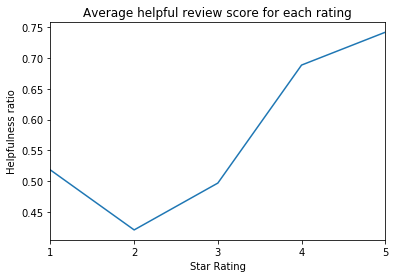

In [294]:
#More helpful reviews for higher rated products
df.groupby('star_rating')['helpful_ratio'].mean().plot()

plt.xlabel('Star Rating')
plt.ylabel('Helpfulness ratio')
plt.title('Average helpful review score for each rating')
plt.xticks(np.arange(1, 6, step=1))
plt.savefig("img/helpfulbyrating.png", dpi=200, bbox_inches='tight')
plt.show()


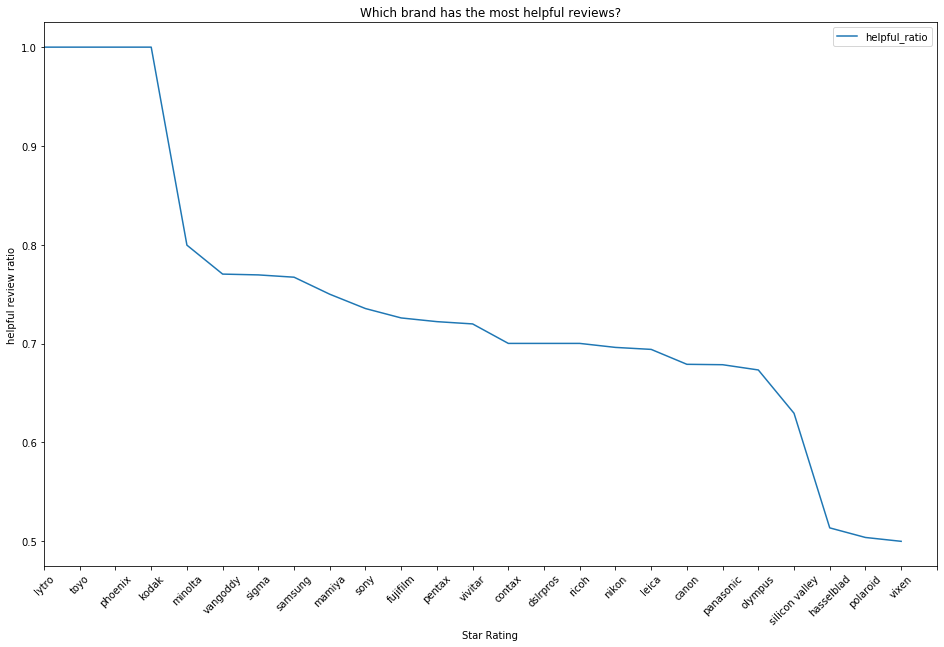

In [295]:
#Helpful review ratio by brand (remember many reviews were filled with mean 0.7)

fig, ax = plt.subplots()
grouped = df.groupby('camera_brand').mean()[['helpful_ratio']].sort_values(
    by='helpful_ratio', ascending=False)
grouped.plot(figsize=(16,10), ax=ax)

ax.set_xlabel('Star Rating')
ax.set_ylabel('helpful review ratio')
ax.set_title('Which brand has the most helpful reviews?')
ax.set_xticks(range(26))
ax.set_xticklabels( grouped.index, rotation=45)
fig.savefig("img/brandhelpfulratio.png", dpi=200, bbox_inches='tight')
plt.show()


In [306]:
(ax.get_xticks())

array([ 0.,  5., 10., 15., 20., 25.])

In [308]:
grouped.index

Index(['toyo', 'kodak', 'lytro', 'phoenix', 'mamiya', 'sigma', 'minolta',
       'fujifilm', 'leica', 'pentax', 'samsung', 'panasonic', 'olympus',
       'canon', 'nikon', 'sony', 'hasselblad', 'polaroid', 'vixen', 'vivitar',
       'silicon valley', 'vangoddy', 'contax', 'ricoh', 'dslrpros'],
      dtype='object', name='camera_brand')

<a name="reviewlengtheda"> </a>
## Review Length

In [44]:
#Median review is 85 words 
df.review_length.describe()

count    4252.000000
mean      190.542803
std       343.538724
min         1.000000
25%        32.000000
50%        85.000000
75%       218.250000
max      8542.000000
Name: review_length, dtype: float64

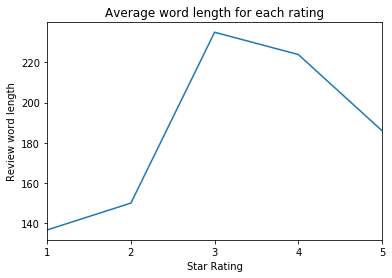

In [296]:
#No obvious trend in review length and rating for each rating
df.groupby('star_rating')['review_length'].mean().plot()

plt.xlabel('Star Rating')
plt.ylabel('Review word length')
plt.title('Average word length for each rating')
plt.xticks(np.arange(1, 6, step=1))
plt.savefig("img/reviewlengthratings.png", dpi=200, bbox_inches='tight')
plt.show()

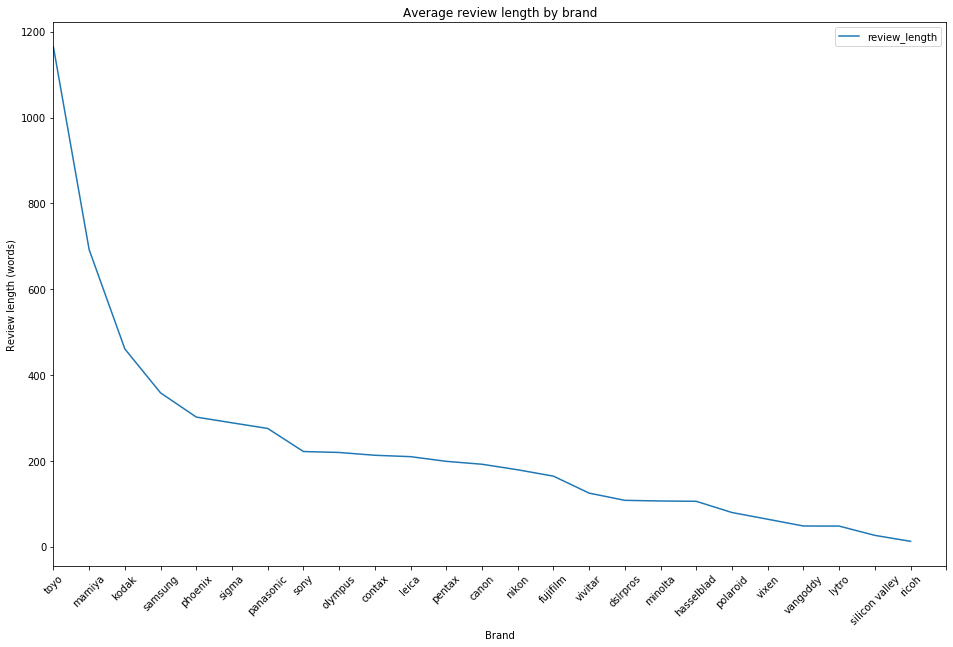

In [297]:
#Do people write more for certain brands? 

fig, ax = plt.subplots()

grouped2 = df.groupby('camera_brand').mean()[['review_length']].sort_values(by='review_length', ascending=False)
grouped2.plot(figsize=(16,10), ax=ax)

ax.set_xlabel('Brand')
ax.set_ylabel('Review length (words)')
ax.set_title('Average review length by brand')
ax.set_xticks(range(26))
ax.set_xticklabels( grouped2.index, rotation=45)
plt.savefig("img/reviewlengthavgbrand.png", dpi=200, bbox_inches='tight')
plt.show()





In [298]:
#How long are the top 5 most helpful reviews?
df[df['helpful_ratio'] == 1].sort_values(by='helpful_votes', ascending=False)[['product_title','star_rating', 'helpful_votes','total_votes','helpful_ratio', 'review_length']].head(5)

,product_title,star_rating,helpful_votes,total_votes,helpful_ratio,review_length
3954,Canon EOS 20D DSLR Camera (Body Only) (OLD MODEL),5,96,96,1.0,1507
2554,Nikon D4 16.2 MP CMOS FX Digital SLR with Full...,5,69,69,1.0,579
3514,Nikon D40 6.1MP Digital SLR Camera (Body Only),5,58,58,1.0,1800
4236,Canon EOS Elan IIe Date 35mm SLR Camera (Body ...,5,47,47,1.0,301
3112,Canon EOS Rebel XS 10.1-Megapixel Digital SLR ...,5,35,35,1.0,147


In [299]:
#Are longer reviews more helpful? Not really apart from very short <40 words are less helpful
grouped = df.groupby('review_length')[['helpful_ratio']].mean()

In [300]:
pd.Series(grouped.index)

0         1
1         2
2         3
3         4
4         5
       ... 
765    3857
766    3933
767    4233
768    5307
769    8542
Name: review_length, Length: 770, dtype: int64

In [301]:

grouped['Word count bins'] = pd.qcut(pd.Series(grouped.index), 20)

grouped.head()


,helpful_ratio,Word count bins
review_length,,
1,0.414384,"(0.999, 39.45]"
2,0.433214,"(0.999, 39.45]"
3,0.521102,"(0.999, 39.45]"
4,0.557283,"(0.999, 39.45]"
5,0.423713,"(0.999, 39.45]"


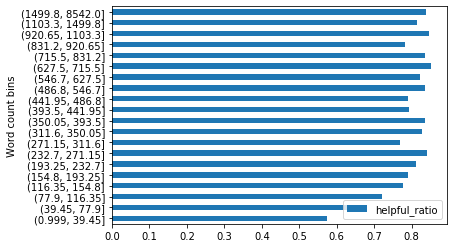

In [302]:
grouped.groupby('Word count bins').mean().plot(kind='barh')
ax.set_xlabel('Brand')
ax.set_ylabel('Review length (words)')
ax.set_title('Average review length by brand')
ax.set_xticks(range(26))
ax.set_xticklabels( grouped2.index, rotation=45)
plt.savefig("img/reviewlengthhelpfulness.png", dpi=200, bbox_inches='tight')
plt.show()

<a name="verifiededa"> </a>
## Verified Purchases

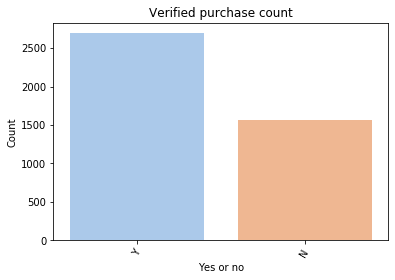

In [303]:
fig, ax = plt.subplots() 
sns.countplot(x='verified_purchase', data=df, palette='pastel', order=df['verified_purchase'].value_counts().index)
plt.xlabel('Yes or no')
plt.xticks(rotation=60)
plt.ylabel('Count')

plt.savefig("img/verified.png", dpi=200, bbox_inches='tight')

plt.title('Verified purchase count')

plt.show()




<a name="texteda"> </a>
## Text analysis

There are 118535 words in the combination of all review.


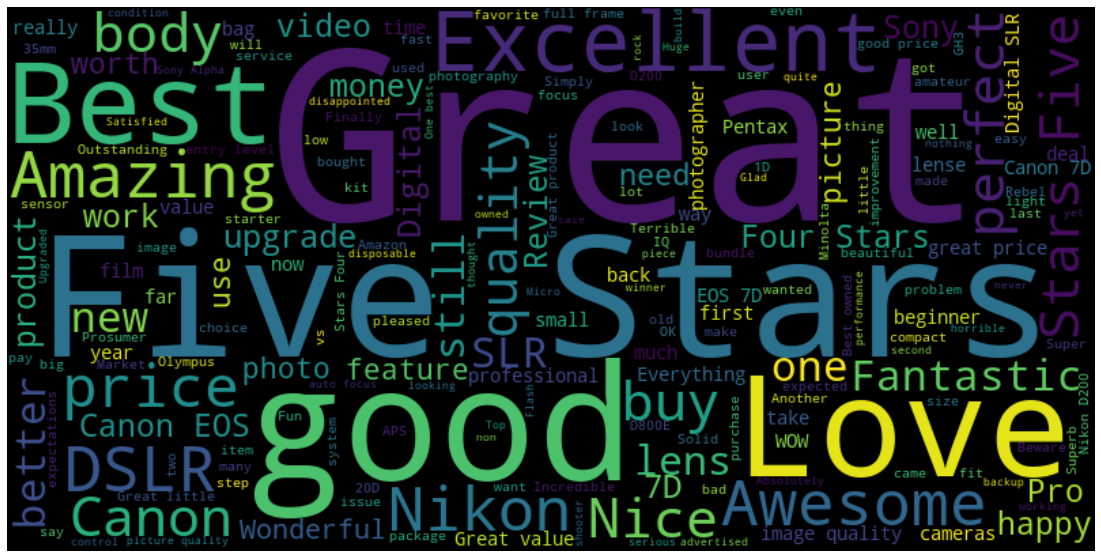

In [90]:
# popular words in review headlines

text = " ".join(review for review in df.review_headline)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["camera"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("img/headline_wordcloud.png")

There are 3802536 words in the combination of all review.


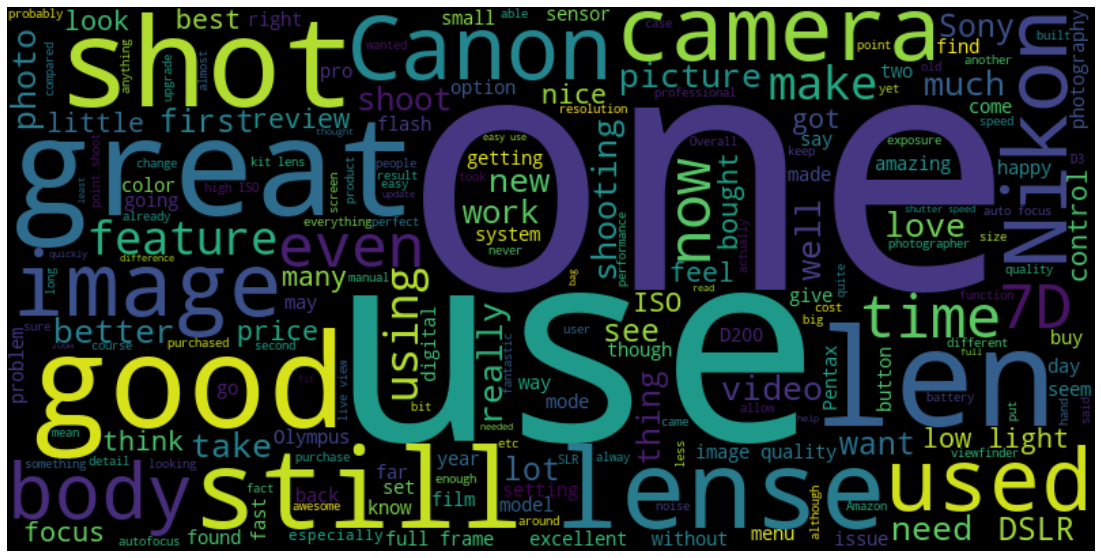

In [91]:
#Popular words in positive reviews (4 stars or higher)

positive = df[ (df['star_rating'] == 4) | (df['star_rating'] == 5)]

text = " ".join(review for review in positive.review_body)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["camera","br","will"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("img/positive_wordcloud.png")

There are 265922 words in the combination of all review.


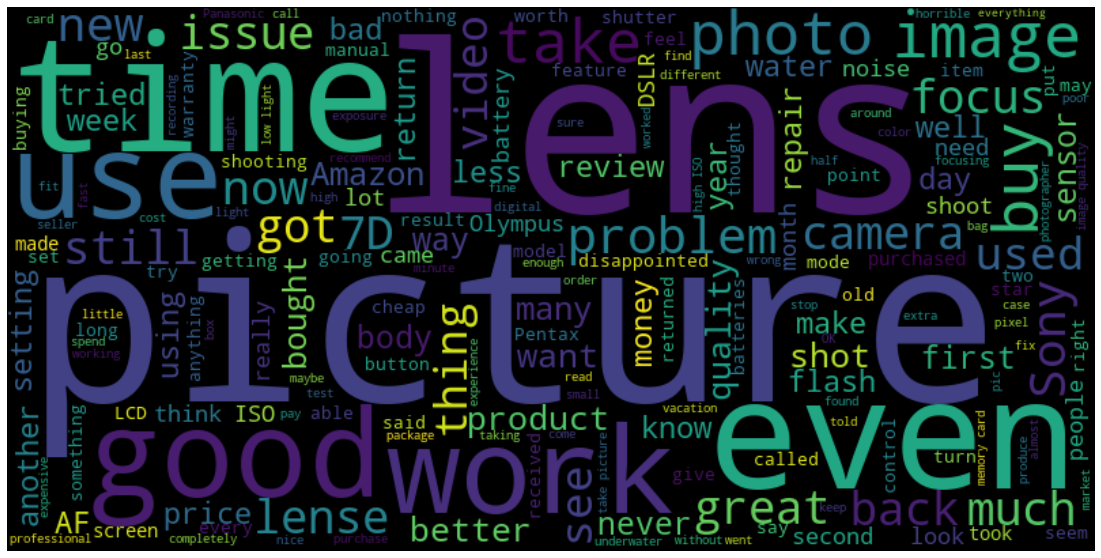

In [95]:
#popular words in negative reviews 

negative = df[ (df['star_rating'] == 1) | (df['star_rating'] == 2)]


text = " ".join(review for review in negative.review_body)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["camera","br","will","canon",'Nikon','one'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("img/negative_wordcloud.png")

In [9]:
# Using the CountVectorizer to count word frequency
def get_freq_words(sparse_counts, columns):

    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting

    word_counts = np.ravel(X_all.sum(axis=0))
    freq_words = pd.Series(
        word_counts, index=columns).sort_values(ascending=False)

    return freq_words

In [10]:
#Frequently occuring words are all camera specifications often covered in reviews
#low light, image quality, auto focus, high iso, live view, white balance, battery life, shutter speed, dynamic range, build quality 

#Custom stopwords 
stop = stopwords.words('english')
stop += ['br'] #Remove the html tag

#expanding the ngram range gives me more specific info. br tags 
cvec = CountVectorizer(stop_words=stop, ngram_range=(2, 4))
X_all = cvec.fit_transform(df['review_body'])
columns = cvec.get_feature_names()

freq_words = get_freq_words(X_all, columns)
freq_words[:30]



low light          637
image quality      585
full frame         430
great camera       423
auto focus         341
high iso           296
point shoot        292
kit lens           255
live view          250
camera body        238
love camera        225
white balance      224
easy use           221
picture quality    213
much better        210
shutter speed      200
battery life       198
mark ii            192
digital camera     191
dynamic range      187
digital slr        167
use camera         164
ed af              163
build quality      159
camera great       158
bought camera      151
canon eos          147
manual focus       143
high quality       142
per second         141
dtype: int64

In [306]:
#Frequently occuring phrases for 1* reviews
cvec = CountVectorizer(stop_words=stop, ngram_range=(2, 4))
X_all = cvec.fit_transform(df[df['star_rating'] == 1]['review_body'])
columns = cvec.get_feature_names()

freq_words = get_freq_words(X_all, columns)
freq_words[:30]

memory card         22
customer service    16
camera body         15
image quality       13
high iso            13
fn iii              13
used camera         12
picture quality     12
hot pixels          12
low light           11
piece junk           9
brand new            9
buy camera           9
auto focus           9
purchased camera     9
take pictures        8
camera one           8
camera work          8
digital camera       8
shutter speed        8
could get            8
take picture         8
camera would         8
received camera      7
white balance        7
sd card              7
got camera           7
use camera           7
low iso              7
camera case          7
dtype: int64

In [307]:
#Frequently occuring phrases for 5* reviews
cvec = CountVectorizer(stop_words=stop, ngram_range=(2, 3))
X_all = cvec.fit_transform(df[df['star_rating'] == 5]['review_body'])
columns = cvec.get_feature_names()

freq_words = get_freq_words(X_all, columns)
freq_words[:30]

low light           457
image quality       416
full frame          331
great camera        328
point shoot         244
auto focus          221
high iso            218
love camera         192
live view           188
kit lens            182
easy use            174
ed af               163
camera body         158
picture quality     154
digital camera      153
much better         152
mark ii             147
white balance       137
dynamic range       136
digital slr         135
battery life        134
shutter speed       133
camera great        123
af dx               120
use camera          120
highly recommend    120
canon eos           119
per second          114
build quality       113
depth field         109
dtype: int64

<a name="reviewers"> </a>
## Reviewer behaviour



In [308]:
#Most frequent reviewers 
df['customer_id'].value_counts()[:10]

45664110    6
40109303    6
9115336     5
19541636    4
27140716    4
10572690    4
46160224    4
17237889    3
44250386    3
49410262    3
Name: customer_id, dtype: int64

In [228]:
#Most frequent reviewer in this sample left all 4* reviews. They look like affiliate link spam
df[df['customer_id'] == 45664110]['review_body'].values

array(['For the first-timer or family photographer, the Pentax K-S2 is a nice dSLR, but it drops the ball for video and you should pass on the new 18-50mm kit lens when compared to something like this Nikon here: http://amzn.to/1LnoPdl<br /><br />THE GOOD:<br />+ The Pentax K-S2 offers excellent photo quality, a solid weather-sealed build, a big viewfinder and a broad feature set.<br /><br />THE BAD:<br />- Its video quality is middling to poor.<br /><br />An all-round good Pentax camera offering good quality you would expect but should only be purchased for the image quality aspect as the video shooting leaves some to be desired. If video will be important then maybe try something like this Canon here: http://amzn.to/1dPisGK',
       'For the first-timer or family photographer, the Pentax K-S2 is a nice dSLR, but it drops the ball for video and you should pass on the new 18-50mm kit lens when compared to something like this Nikon here: http://amzn.to/1bA7YcP<br /><br />THE GOOD:<br />

In [309]:
#Reviewers who write the most tend to have a high helpful ratio.
customers = df.groupby('customer_id').mean()[['star_rating','total_votes','helpful_ratio','review_length']].sort_values(by='review_length', ascending=False)
customers.head(10)

,star_rating,total_votes,helpful_ratio,review_length
customer_id,,,,
53089089,5.0,118.0,0.983051,8542.0
47739285,5.0,233.0,0.969957,5307.0
37149793,5.0,239.0,0.983264,3933.0
49055733,5.0,57.0,0.877193,3857.0
47904504,4.0,900.0,0.980000,3830.0
32013796,4.0,153.0,0.993464,3530.0
10550648,5.0,463.0,0.967603,3225.0
12019261,4.0,8.0,0.766667,2752.5
40888222,5.0,75.0,0.986667,2397.0


<a name="correlationheatmap"> </a>
## Correlation heatmap




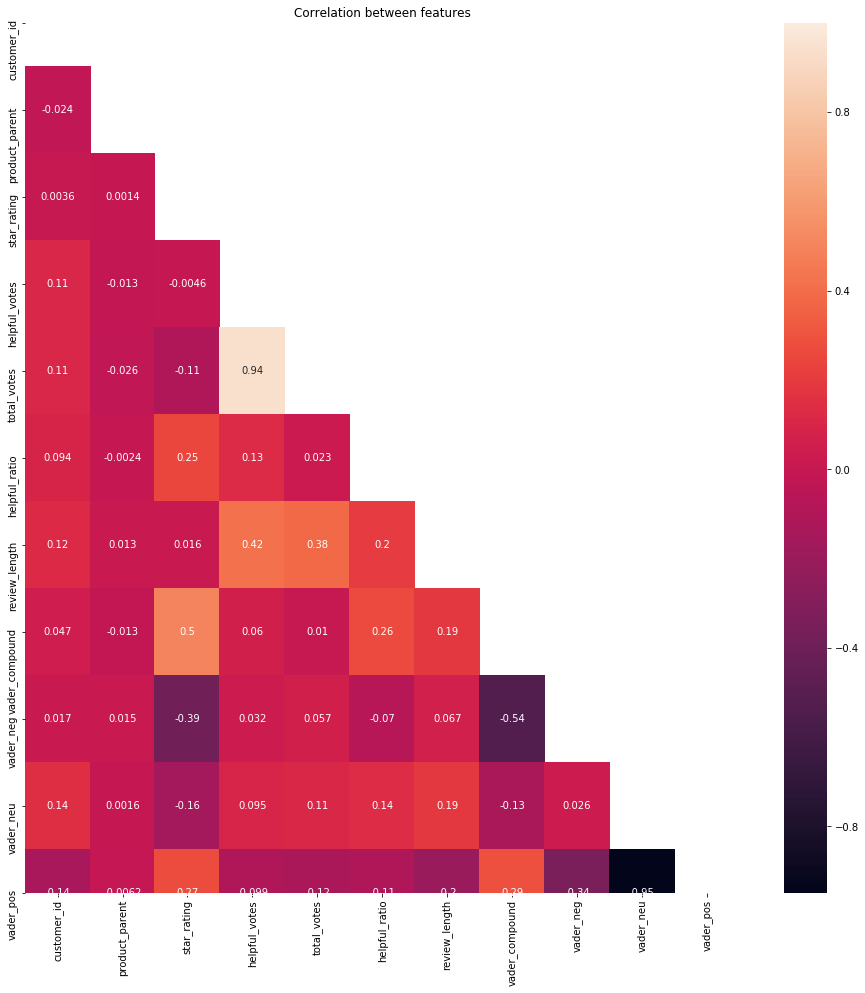

In [310]:
df.corr()

#plot a heatmap with correlation matrix - truncation error clipping with numpy version 3.1.1 - to be resolved in next version
plt.figure(figsize=(16, 16))

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), annot=True, mask=mask)

plt.savefig("img/heatmap.png", dpi=200, bbox_inches='tight')

plt.title('Correlation between features')

plt.show()



<a name="scraping"> </a>
# Web Scraping current reviews


<a name="productscraper"> </a>
## Product Scraper by URL

In [237]:
# Future additions 
# Error handling - try/except, timeout handling, proxy rotation, concurrent scraping

#e.g
# timeout = 30
# try:
#     WebDriverWait(driver, timeout).until(EC.visibility_of_element_located((By.ID, "mainResults")))
# except TimeoutException:
#     driver.quit()
# # from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import TimeoutException

In [93]:
def product_scraper(base_url, page):

    asin = []
    url = []
    product_name = []
    review_count = []
    avg_rating = []
    prices = []
    products = {}

    #FIRST PAGE
    

    driver = webdriver.Chrome(executable_path='./chromedriver')
    driver.get(base_url)
    #Save page source into Beautiful Soup
    Soup = BeautifulSoup(driver.page_source,'html.parser')
    #select each product listing
    first_page_results = Soup.select('#mainResults > ul > li')

    #in each product listing extract   
    
    for item in first_page_results:
        
        try:
            asin.append(item.attrs['data-asin'])
        except: 
            asin.append(np.nan)
        
        try:
             url.append(item.find('a').attrs['href'])
        except:
            url.append(np.nan)
        
        try:
            product_name.append(item.find('h2').attrs['data-attribute'])
        except:
            product_name.append(np.nan)
            
        try:
            avg_rating.append(item.find('span', class_ = 'a-icon-alt').text)
        except:
            avg_rating.append(np.nan)
        
        try:
            review_count.append(item.find_all('a','a-size-small')[-1].text) 
        except:
            review_count.append(np.nan)
        
        try:
            prices.append(item.find('span','sx-price-whole').text + "." + item.find('sup','sx-price-fractional').text)
       
        except:
            prices.append(np.nan)
    
    
    #After running the first page sleep, and click to the next page

    time.sleep(2.5)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1.0)
    next_button = driver.find_element_by_xpath("//*[@id='pagnNextLink']")
    next_button.click()

    
    
    #SECOND PAGE FUNCTION
    def get_morepages():
        
        
         
        Soup2 = BeautifulSoup(driver.page_source,'html.parser')
    
        all_results_pg2 = Soup2.find_all('div','s-result-item')

        for item in all_results_pg2:
        
            try:
                asin.append(item.attrs['data-asin'])       
            except:
                asin.append(np.nan)
            
            try:
                url.append("https://www.amazon.com" + item.find('a').attrs['href'])
            except:
                url.append(np.nan)
            
            try:
                product_name.append(item.find('span', 'a-size-medium').text)
                
            except:
                product_name.append(np.nan)
                
            
            try:
                avg_rating.append(item.find('span', class_ = 'a-icon-alt').text)

            except:
                avg_rating.append(np.nan)
            
            try:
                review_count.append(item.find('span','a-size-base').text) 

            except:
                review_count.append(np.nan)
    
            try:
                prices.append(item.find('span','a-price-whole').text + item.find('span','a-price-fraction').text)
       
            except:
                prices.append(np.nan)
    
    ()
    
    #set parameter for range of pages to loop 
    for i in range(1,page):
        time.sleep(random.randint(6,10)) #random waiting time between 6 and 10 seconds
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        get_morepages() #run scraper for the page 
        time.sleep(1.0)
        next_button = driver.find_element_by_xpath("//*[@class='a-last']") #update with new link
        next_button.click()
        

    #create dictionary from lists  
    products = {'ASIN':asin,'URL':url, 'Product':product_name, 'Reviews':review_count,'Rating':avg_rating, 'Price':prices}
    
    
    #create DataFrame
    df_clean = pd.DataFrame(products)

    #data cleaning

    print("observations before cleaning",df_clean.shape)
    #Remove missing values
    df_clean.dropna(inplace=True)
    


    #Remove commas for large reviews and prices 
    df_clean['Reviews'] = df_clean['Reviews'].str.replace(",","")
    df_clean['Price'] = df_clean['Price'].str.replace(",","")

    #Splice only value of rating
    df_clean['Rating'] = df_clean.Rating.str.split(" ", 1, expand=True)[0]

    #adjusting data types
    df_clean.Reviews = df_clean.Reviews.astype(int)
    df_clean.Rating = df_clean.Rating.astype(float)
    df_clean.Price = df_clean.Price.astype(float)

    #remove duplicates by multiple ASIN
    df_clean = df_clean.sort_values(by='ASIN')
    df_clean = df_clean.drop_duplicates(subset='ASIN')
    

   

    print("observations after cleaning",df_clean.shape)
    
    #SAVE TO CSV CLEANED DATA
    
    df_clean.to_csv(r'cameras.csv', mode='a', header=True, index=False)  


In [7]:
#Amazon first page urls for categories of cameras
DSLR = 'https://www.amazon.com/s?i=photo&rh=n%3A172282%2Cn%3A493964%2Cn%3A502394%2Cn%3A281052%2Cn%3A3017941&page=1&qid=1566759904&ref=sr_pg_1'
MIRRORLESS = 'https://www.amazon.com/Mirrorless-Cameras/b/?ie=UTF8&node=3109924011&ref_=sv_camera_4'
ACTION = 'https://www.amazon.com/Sports-Action-Video-Cameras/b/?ie=UTF8&node=7161074011&ref_=sv_camera_7'
POINTANDSHOOT = 'https://www.amazon.com/Digital-Cameras-Photo/b/?ie=UTF8&node=330405011&ref_=sv_camera_6'

#running product scraper that saves CSV in local folder
product_scraper(POINTANDSHOOT, 20)


observations before cleaning (328, 6)
observations after cleaning (264, 6)


## Reviews scraper by ASIN
<a name="reviewscraper"> </a>

In [94]:
def review_scraper(asin, reviewpages): 

    #Get URL and goto page
    driver = webdriver.Chrome(executable_path='./chromedriver')
    driver.get('https://www.amazon.com/gp/product/{}'.format(asin))

    #scroll to bottom of page and sleep 
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2.0)

    #navigate to all reviews page 
    next_button = driver.find_element_by_xpath('//*[@id="reviews-medley-footer"]/div[2]/a') 
    try:
        next_button.click()
    except:
        time.sleep(30.5)
        try:
            next_button.click()
        except:
            driver.find_element_by_partial_link_text('Next').click()
            
        

    

    #In review section scrape all details 
    profile_name = []
    user_url_id = []
    review_date = []
    star_rating = []
    review_title = []
    helpful_votes = []
    total_comments = []
    verified_purchase = []
    review_body = []
    review_id = []

    def review_scraper_inner():
        
        #Scrape page source
        Soup = BeautifulSoup(driver.page_source,'html.parser')
        
   
    
    
        
        for review in Soup.find_all(attrs={"data-hook" : "review"}):
            
            
            try:
                review_id.append(review.attrs['id'])
            except:
                review_id.append(np.nan)

            try:
                profile_name.append(review.find("span", "a-profile-name").text)
            except:
                profile_name.append(np.nan)


            try:
                user_url_id.append(review.find("a","a-profile").attrs['href'])
            except:
                user_url_id.append(np.nan)

            try:
                review_date.append(review.find(attrs={"data-hook" : "review-date"}).text)
            except:
                review_date.append(np.nan)

            try:
                star_rating.append(review.find("span", "a-icon-alt").text)
            except:
                star_rating.append(np.nan)

            try:
                review_title.append(review.find(attrs={"data-hook" : "review-title"}).text.strip())
            except:
                review_title.append(np.nan)

            try:
                helpful_votes.append(review.find(attrs={"data-hook" : "helpful-vote-statement"}).text)
            except:
                helpful_votes.append(np.nan)

            try:
                total_comments.append(review.find("span","review-comment-total").text)
            except:
                total_comments.append(np.nan)

            try:
                verified_purchase.append(review.find(attrs={"data-hook" : "avp-badge"}).text)
            except:
                verified_purchase.append(np.nan)

            try:
                review_body.append(review.find(attrs={"data-hook" : "review-body"}).text)
            except:
                review_body.append(np.nan)

    
    reviewpages = reviewpages+1
    #set parameter for range of pages to loop 
    for i in range(1,reviewpages):
        
        time.sleep(random.randint(4,7)) #random waiting time between 6 and 10 seconds
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(1.5)
        review_scraper_inner() #run scraper for the page 
        time.sleep(2.5)
#         driver.find_element_by_xpath('//*[@class="a-last"]/a').click()
#         driver.find(attrs={"data-hook" : "see-all-reviews-link-foot"}).click()
        try:
            driver.find_element_by_partial_link_text('Next').click()
        except:
            time.sleep(30.5)
            try:
                driver.find_element_by_partial_link_text('Next').click()
            except:
                driver.find_element_by_xpath('//*[@id="reviews-medley-footer"]/div[2]/a').click()
        
        
        
    #create dictionary from lists  
    reviews = {'ASIN':asin, 'review_id':review_id, 'profile_name': profile_name,'user_url_id':user_url_id,'review_date':review_date,'star_rating': star_rating,'review_title':review_title,'helpful_votes':helpful_votes,'total_comments':total_comments,'verified_purchase':verified_purchase,'review_body':review_body     }


    #create DataFrame
    df_reviews = pd.DataFrame(reviews)

    #data cleaning
    
    
    print("observations before cleaning",df_reviews.shape)
    
    #Won't remove missing values - Verified purchase may be missing. check this from sample data
    
    #Splice only value of rating
    
    try:
        df_reviews['star_rating'] = df_reviews.star_rating.str.split(".", 1, expand=True)[0]
    except:
        df_reviews['star_rating'] = df_reviews.star_rating
        print('error cleaning star rating')
        
    try:
        df_reviews['helpful_votes'] = df_reviews.helpful_votes.str.split(" ", 1, expand=True)[0]
    except:
        df_reviews['helpful_votes'] = df_reviews.helpful_votes
        print('error cleaning helpful votes')
    
    try:
        df_reviews['total_comments'] = df_reviews.total_comments.str.split(" ", 1, expand=True)[0]
    except:
        df_reviews['total_comments'] = df_reviews.total_comments
        print('error cleaning total_comments')
        


        
        
    #Remove commas for large reviews and prices 
    
    try:
        df_reviews['helpful_votes'] = df_reviews['helpful_votes'].str.replace(",","")
    except:
        df_reviews['helpful_votes'] = df_reviews['helpful_votes']
        print('error cleaning helpful votes commas')
    
    try:
        df_reviews['total_comments'] = df_reviews['total_comments'].str.replace(",","")
    except:
        df_reviews['total_comments'] = df_reviews['total_comments']
        print('error cleaning total_comments commas')


    #adjusting data types

#     df_reviews.star_rating = df_reviews.star_rating.astype(int)
    
#     try:
#         df_reviews.helpful_votes = df_reviews.helpful_votes.astype(int)
    
#     except:
        
#     try:
#         df_reviews.total_comments = df_reviews.total_comments.astype(int)
    
#     except:
        

    #remove duplicates by reviewID
    df_reviews = df_reviews.sort_values(by='review_id')
    df_reviews = df_reviews.drop_duplicates(subset='review_id')
    

   

    print("observations after cleaning",df_reviews.shape)
    
    
    


    #SAVE TO CSV CLEANED DATA from list
    df_reviews.to_csv(r'reviews.csv', mode='a', header=True, index=False)
    
    driver.close()
    

In [239]:
#Test run
asin = 'B01BUYK04A'
reviewpages = 4
review_scraper(asin, reviewpages)

## Text Preprocessing (revisit after modelling)

In [ ]:
#     Text Preprocessing.
#             a. Converting to lower-case. * though VADER treats caps with more weight
#             b. Removing HTML Tags. Only <br>
#             c. Removing Special Characters. Are some useful e.g ! emphasises
#             d. Removing Stop Words. Yes
#             e. Stemming (Snowball Stemming)

<a name="modelling"> </a>
# Modelling 



In [50]:
#load csv 
df = pd.read_csv("cleaned.csv")

<a name="baseline"> </a>
## Baseline accuracy score

In [4]:
y = df['star_rating']

In [5]:
#0.7135 class imbalance of 5 star ratings. Accuracy isn't going to be the best metric
y.value_counts(normalize=True) 

5    0.713547
4    0.153104
1    0.057385
3    0.050094
2    0.025870
Name: star_rating, dtype: float64

<a name="reviewbodyonly"> </a>
## Review body as only feature 

In [7]:
# Set predictor variables
X = df['review_body']

In [8]:
#Train test split using stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                             test_size=0.3,
                                             stratify=y, random_state=1)
print( y_train.shape,X_train.shape, y_test.shape,X_test.shape )

(2976,) (2976,) (1276,) (1276,)


In [18]:
#Set up Bag of words matrices with Count Vectoriser and TFIDF

In [13]:
#Custom stopwords 
stop = stopwords.words('english')
stop += ['br'] #Remove the html tag

In [9]:


# Setting the vectorizer just like we would set a model with ngram range 2,4
cvec = CountVectorizer(stop_words=stop, ngram_range=(2, 4))

# Fitting the vectorizer on review_body in training data
cvec.fit(X_train)

# Transform training data into sparse matrix
cvec_ma = cvec.transform(X)

# Transform training data into sparse matrix
cvec_mat_train = cvec.transform(X_train)

# Transform test data into sparse matrix
cvec_mat_test = cvec.transform(X_test)

In [10]:
# words occuring
words = cvec.get_feature_names()
print(words[5000:5020])
# number of different words
print(len(words))

['15 shipped f70 complaining', '15 since', '15 since started', '15 since started writing', '15 slider', '15 slider lightroom', '15 slider lightroom chroma', '15 spend', '15 still', '15 still use', '15 still use canon', '15 transcend', '15 transcend 8gb', '15 transcend 8gb compact', '15 year', '15 year old', '15 year old camera', '15 year old daughter', '15 years', '15 years ago']
671148


In [11]:
#TFIDF vectoriser

# Setting the vectorizer just like we would set a model
tfidf = TfidfVectorizer(stop_words= stopwords.words('english'), min_df=0.0005, ngram_range=(2, 4))

# Fitting the vectorizer on our training data review_body
tfidf.fit(X_train)

# Transform training data into sparse matrix
tfidf_mat_train = tfidf.transform(X_train) 

# Transform test data into sparse matrix
tfidf_mat_test = tfidf.transform(X_test)


In [12]:
#TFIDF weights -- further analysis https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XXUSWC2ZPhM 

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(cvec_mat_train)


# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cvec.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])[:20]

,idf_weights
great camera,3.291561
low light,3.335711
image quality,3.422722
full frame,3.715468
auto focus,3.917267
love camera,3.948815
point shoot,3.961719
camera body,4.008239
high iso,4.049911
easy use,4.064197


In [27]:
def fit_and_score(pipeline_name, summary_df, model_name):
    pipeline_name.fit(X_train, y_train)

    test_score = pipeline_name.score(X_test, y_test)
    print("Test set score", test_score)

    scores = cross_val_score(pipeline_name, X_train, y_train, cv=3)
    print('Cross validation training score:', scores.mean())

    #Confusion Matrix and classification report

    predictions_test = pipeline_name.predict(X_test)
    predictions_train = pipeline_name.predict(X_train)
    confusion = pd.DataFrame(confusion_matrix(y_test, predictions_test),
                 index=['True 1', 'True 2','True 3','True 4','True 5'],
                 columns=['p1', 'p2','p3','p4','p5'])

    probs = pipeline_name.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, predictions_test, digits=4 ))
    
    
    #SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
    #Adding weighted avg results from each model into a summary DataFrame
    temp_report = classification_report(y_test, predictions_test, output_dict=True)
    #Create a dataframe from the classification report
    temp_results = pd.DataFrame(temp_report).transpose()
    #adding the accuracy column
    temp_results['cross_val training score'] = scores.mean()
    temp_results['test score'] = test_score
    #get that row as a series
    temp_results.iloc[7,:]
    #adding new models as columns that I can put into each model output
    summary_df[model_name] = temp_results.iloc[7,:]
     
    return confusion
    return review_body_summary





In [42]:
#Create empty dataframe for results
review_body_summary = pd.DataFrame()

<a name="logregonefeatcvec"> </a>
### Logistic Regression CVEC


In [44]:
#Lower ngram range seems to perform better

pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=stop, ngram_range=(1, 2))),
    #('tfidf', tfidf_transformer), doesn't make much difference to results
    ('cls', LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000, class_weight='balanced'))
])

fit_and_score(pipeline, review_body_summary, "Logreg CVEC")


Test set score 0.7108150470219435
Cross validation training score: 0.7076596783545425
              precision    recall  f1-score   support

           1     0.4937    0.5342    0.5132        73
           2     0.0000    0.0000    0.0000        33
           3     0.1667    0.0781    0.1064        64
           4     0.2846    0.1795    0.2201       195
           5     0.7946    0.9089    0.8479       911

   micro avg     0.7108    0.7108    0.7108      1276
   macro avg     0.3479    0.3402    0.3375      1276
weighted avg     0.6474    0.7108    0.6737      1276



,p1,p2,p3,p4,p5
True 1,39,2,3,5,24
True 2,12,0,5,6,10
True 3,11,0,5,14,34
True 4,4,0,10,35,146
True 5,13,0,7,63,828


In [50]:
#Taking a look at summary DataFrame to ensure it matches results above
review_body_summary

,Logreg CVEC,Logreg TFIDF,MN NaiveBayes
precision,0.647411,0.652059,0.618355
recall,0.710815,0.700627,0.713950
f1-score,0.673710,0.674320,0.597667
support,1276.000000,1276.000000,1276.000000
cross_val training score,0.707660,0.714046,0.714048
test score,0.710815,0.700627,0.713950


<a name="logregonefeat"> </a>
###  LogisticRegression TFIDF

In [46]:
#adjusting min_df low

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop, min_df=0.0005, ngram_range=(1, 2))),
     #  ('tfidft', TfidfTransformer(smooth_idf=True,use_idf=True)),
    ('cls', LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000, class_weight='balanced'))
])
fit_and_score(pipeline, review_body_summary, "Logreg TFIDF")

Test set score 0.700626959247649
Cross validation training score: 0.7140457953146774
              precision    recall  f1-score   support

           1     0.4891    0.6164    0.5455        73
           2     0.0000    0.0000    0.0000        33
           3     0.0588    0.0156    0.0247        64
           4     0.2472    0.2256    0.2359       195
           5     0.8171    0.8825    0.8485       911

   micro avg     0.7006    0.7006    0.7006      1276
   macro avg     0.3224    0.3481    0.3309      1276
weighted avg     0.6521    0.7006    0.6743      1276



,p1,p2,p3,p4,p5
True 1,45,0,3,8,17
True 2,12,0,2,12,7
True 3,11,3,1,23,26
True 4,9,2,10,44,130
True 5,15,0,1,91,804


<a name="nbonefeat"> </a>
###  Multinomial Naive Bayes 

In [49]:
pipeline = Pipeline([
    #('tfidf', TfidfVectorizer(stop_words= stopwords.words('english'), min_df=0.0005, ngram_range=(1, 2))),
    ('vect', CountVectorizer(stop_words=stop, ngram_range=(1, 2))),
    ('cls', MultinomialNB())
])
      
fit_and_score(pipeline, review_body_summary, "MN NaiveBayes")

Test set score 0.7139498432601881
Cross validation training score: 0.7140478297577996
              precision    recall  f1-score   support

           1     1.0000    0.0137    0.0270        73
           2     0.0000    0.0000    0.0000        33
           3     0.0000    0.0000    0.0000        64
           4     0.3333    0.0051    0.0101       195
           5     0.7146    0.9978    0.8328       911

   micro avg     0.7139    0.7139    0.7139      1276
   macro avg     0.4096    0.2033    0.1740      1276
weighted avg     0.6184    0.7139    0.5977      1276



/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,p1,p2,p3,p4,p5
True 1,1,0,0,0,72
True 2,0,0,0,0,33
True 3,0,0,0,0,64
True 4,0,0,0,1,194
True 5,0,0,0,2,909


<a name="randforestonefeat"> </a>
### Random Forest

In [51]:
# Random Forest seems to do better with lower n_estimators
pipeline = Pipeline([
     ('vect', CountVectorizer(stop_words=stop, ngram_range=(1, 2))),
    #('tfidf', TfidfTransformer()),
   #   ('tfidf', TfidfVectorizer(stop_words= stopwords.words('english'), min_df=0.0005, ngram_range=(1, 2))),
    ('cls', RandomForestClassifier(n_estimators=8, class_weight='balanced'))
])
fit_and_score(pipeline, review_body_summary, "Random Forest")

Test set score 0.70141065830721
Cross validation training score: 0.7039722501958151
              precision    recall  f1-score   support

           1     0.5000    0.0822    0.1412        73
           2     0.0000    0.0000    0.0000        33
           3     0.0000    0.0000    0.0000        64
           4     0.2222    0.0410    0.0693       195
           5     0.7192    0.9671    0.8249       911

   micro avg     0.7014    0.7014    0.7014      1276
   macro avg     0.2883    0.2181    0.2071      1276
weighted avg     0.5760    0.7014    0.6076      1276



,p1,p2,p3,p4,p5
True 1,6,0,0,1,66
True 2,1,0,0,2,30
True 3,0,0,0,1,63
True 4,2,0,0,8,185
True 5,3,1,2,24,881


<a name="gradboostonefeat"> </a>
### Gradient Boosting

In [52]:
# Gradient Boosting (taking very long to run on my machine, so I didn't parameter tune)

pipeline = Pipeline([
    ('vect', cvec),
    #('tfidf', TfidfTransformer()),
    ('cls', GradientBoostingClassifier(n_estimators=10))
])
fit_and_score(pipeline, review_body_summary, "Gradient Boost")

Test set score 0.7139498432601881
Cross validation training score: 0.713374429084399
              precision    recall  f1-score   support

           1     0.6667    0.0274    0.0526        73
           2     0.0000    0.0000    0.0000        33
           3     0.0000    0.0000    0.0000        64
           4     0.0000    0.0000    0.0000       195
           5     0.7146    0.9978    0.8328       911

   micro avg     0.7139    0.7139    0.7139      1276
   macro avg     0.2763    0.2050    0.1771      1276
weighted avg     0.5483    0.7139    0.5976      1276



/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,p1,p2,p3,p4,p5
True 1,2,0,0,0,71
True 2,0,0,0,0,33
True 3,0,0,0,0,64
True 4,0,0,0,0,195
True 5,1,1,0,0,909


<a name="knnonefeat"> </a>
### KNeighborsClassifier

In [53]:
pipeline = Pipeline([
     ('vect', CountVectorizer(stop_words=stop, ngram_range=(1, 2))),
#       ('tfidf', TfidfVectorizer(stop_words= stopwords.words('english'), min_df=0.0005, ngram_range=(1, 2))),
#    ('tfidft', TfidfTransformer()),
    ('cls', KNeighborsClassifier(n_neighbors=5, weights='distance'))
])
fit_and_score(pipeline, review_body_summary, "KNN")

Test set score 0.7100313479623824
Cross validation training score: 0.7043028472031493
              precision    recall  f1-score   support

           1     0.4286    0.0411    0.0750        73
           2     0.0000    0.0000    0.0000        33
           3     0.0000    0.0000    0.0000        64
           4     0.3182    0.0359    0.0645       195
           5     0.7208    0.9835    0.8319       911

   micro avg     0.7100    0.7100    0.7100      1276
   macro avg     0.2935    0.2121    0.1943      1276
weighted avg     0.5878    0.7100    0.6081      1276



/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,p1,p2,p3,p4,p5
True 1,3,0,1,2,67
True 2,1,0,0,0,32
True 3,1,0,0,0,63
True 4,2,0,1,7,185
True 5,0,0,2,13,896


<a name="svmonefeat"> </a>
### SVM: Support Vector Classifier

In [55]:
pipeline = Pipeline([
#     ('vect', cvec),
    #('tfidf', TfidfTransformer()),
    ('tfidf', TfidfVectorizer()),
    ('cls', svm.SVC(class_weight='balanced', gamma='auto', kernel='linear', probability=True))
])
fit_and_score(pipeline, review_body_summary, "SVM")

Test set score 0.6512539184952978
Cross validation training score: 0.6431362975169622
              precision    recall  f1-score   support

           1     0.4615    0.5753    0.5122        73
           2     0.1429    0.0303    0.0500        33
           3     0.1587    0.1562    0.1575        64
           4     0.2761    0.4205    0.3333       195
           5     0.8509    0.7640    0.8051       911

   micro avg     0.6513    0.6513    0.6513      1276
   macro avg     0.3780    0.3893    0.3716      1276
weighted avg     0.6877    0.6513    0.6642      1276



,p1,p2,p3,p4,p5
True 1,42,1,7,7,16
True 2,12,1,7,12,1
True 3,12,2,10,24,16
True 4,10,0,14,82,89
True 5,15,3,25,172,696


In [56]:
review_body_summary

,Logreg CVEC,Logreg TFIDF,MN NaiveBayes,Random Forest,Gradient Boost,KNN,SVM
precision,0.647411,0.652059,0.618355,0.576026,0.548345,0.587785,0.687722
recall,0.710815,0.700627,0.713950,0.701411,0.713950,0.710031,0.651254
f1-score,0.673710,0.674320,0.597667,0.607604,0.597588,0.608114,0.664229
support,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
cross_val training score,0.707660,0.714046,0.714048,0.703972,0.713374,0.704303,0.643136
test score,0.710815,0.700627,0.713950,0.701411,0.713950,0.710031,0.651254


<a name="sentimentforest"> </a>
## Random Forest with VADER sentiment features

In [320]:
X = df[['vader_compound','vader_pos','vader_neg']].astype(float)
y = df['star_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_s = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

params = {
    'criterion': ['entropy', 'gini'],
    'max_features': np.linspace(0.1,1.0, 10),
}


gs = GridSearchCV(rf, params, n_jobs=-1, cv=5, verbose=1, iid=False)
gs.fit(X_train_s, y_train)


print("training score:", gs.score(X_train_s, y_train))
print("test score:", gs.score(X_test_s, y_test))
print("best parameters:",gs.best_params_)


#Classification report and confusion Matrix
predictions_test = gs.predict(X_test_s)
predictions_train = gs.predict(X_train_s)

confusion = pd.DataFrame(confusion_matrix(y_test, predictions_test),
             index=['True 1', 'True 2','True 3','True 4','True 5'],
             columns=['p1', 'p2','p3','p4','p5'])

probs = gs.predict_proba(X_test_s)[:, 1]

print(classification_report(y_test, predictions_test, digits=4 ))
confusion

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.8s finished


training score: 0.9714381720430108
test score: 0.6669278996865203
best parameters: {'criterion': 'entropy', 'max_features': 0.4}
              precision    recall  f1-score   support

           1     0.2525    0.3425    0.2907        73
           2     0.0000    0.0000    0.0000        33
           3     0.1667    0.0312    0.0526        64
           4     0.1356    0.0410    0.0630       195
           5     0.7500    0.8957    0.8164       911

   micro avg     0.6669    0.6669    0.6669      1276
   macro avg     0.2610    0.2621    0.2445      1276
weighted avg     0.5790    0.6669    0.6118      1276



,p1,p2,p3,p4,p5
True 1,25,7,0,3,38
True 2,8,0,0,5,20
True 3,15,2,2,3,42
True 4,12,2,1,8,172
True 5,39,7,9,40,816


<a name="morefeatures"> </a>
## Modelling with multiple features


In [89]:
df.head()

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_date,review_headline,review_body,helpful_ratio,review_length,camera_brand,vader_compound,vader_neg,vader_neu,vader_pos,binary_rating
0,30739283,R190J2PDOZ5GVK,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,3,36,51,Y,2015-08-31,"Great camera, but there are shortcomings","Great camera, but there are shortcomings : -4...",0.705882,199,sony,0.8964,0.103,0.768,0.129,NaN
1,15760475,R3SGZ5G1GJAWVU,B00TSR7YPK,515216474,Nikon D750 DSLR Camera (Body Only) + 32GB Extr...,5,1,1,Y,2015-08-31,"This camera is amazing, I have a d610 that I r...","This camera is amazing, I have a d610 that I r...",1.000000,21,nikon,0.5100,0.000,0.788,0.212,1.0
2,10861723,R3BWM499VCMGS7,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,5,48,52,Y,2015-08-31,Absolutly Must have camera,"Im a Canon guy, but as soon as I found out thi...",0.923077,212,sony,0.9967,0.022,0.707,0.271,1.0
3,22343417,R3SMKIWNMR55UB,B00O29LKN6,474362814,Canon EOS 7D Mark II Digital SLR Camera (Body ...,5,0,0,Y,2015-08-29,Canon Digital,I read several review's before my purchase. T...,0.700245,14,canon,0.0000,0.000,1.000,0.000,1.0
4,106593,RNBM8M0T11BV0,B009F2OUOQ,968361935,Olympus OM-G OMG OM-20 Manual Focus Film Camer...,1,3,3,Y,2015-08-29,This is only for the camera and strap. There ...,This is only for the camera and strap. There i...,1.000000,33,olympus,-0.6808,0.185,0.815,0.000,0.0


Preprocessing method 1: horizontally stack sparse matrices

In [90]:
#Defining model and preparing features

y = df['star_rating']
X = df[['helpful_ratio','verified_purchase','review_body','review_length','camera_brand','vader_compound','vader_pos','vader_neu','vader_neg']]

#dummify categorical features
X = pd.get_dummies(X, columns=['verified_purchase','camera_brand'])

# Setting the vectorizer 
cvec = CountVectorizer(stop_words=stop, ngram_range=(1, 2))

# Fitting the vectorizer on review_body in training data
cvec_body = cvec.fit_transform(X['review_body'])

X.drop(columns=['review_body'],inplace=True, axis=1)
X.head()

# transform X to sparse matrix and stack next to cvec_body
X = sparse.hstack([sparse.csr_matrix(X.values), cvec_body])

#Create train test split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                             test_size=0.3,
                                             stratify=y, random_state=1)


# #  Standardise numerical data
# columns - ['helpful_ratio','review_length''vader_compound','vader_pos','vader_neu','vader_neg']

scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Preprocessing method 2: Using Column Transformer

In [51]:
y = df['star_rating']
X = df[['helpful_ratio','verified_purchase','review_body','review_length','camera_brand','vader_pos','vader_neg']]

#Create train test split 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                             test_size=0.3,
                                             stratify=y, random_state=1)


# Could also have selected features by their dtypes. Below I have manually added them
# numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = X_train.select_dtypes(include=['object']).drop(['review_body'], axis=1).columns



# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['helpful_ratio', 'review_length', 'vader_pos', 'vader_neg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['verified_purchase', 'camera_brand']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

nlp_features = 'review_body'
nlp_transformer = Pipeline(steps=[
     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
#    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])

In [52]:
X_train[numeric_features] = X_train[numeric_features].astype('float64')

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [53]:
X_train.dtypes

helpful_ratio        float64
verified_purchase     object
review_body           object
review_length        float64
camera_brand          object
vader_pos            float64
vader_neg            float64
dtype: object

In [94]:
#Create empty dataframes for results
multiple_features_summary_tfidf = pd.DataFrame()
multiple_features_summary_cvec = pd.DataFrame()

In [95]:
#iterate through models with tfidf vectoriser

models = [KNeighborsClassifier(n_neighbors=5, weights='distance'),  
svm.SVC(class_weight='balanced', gamma='auto', kernel='linear', probability=True),
LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', multi_class= 'ovr'),
RandomForestClassifier(n_estimators=8, class_weight='balanced'),
GradientBoostingClassifier(n_estimators=10)
]
                   

for model in models:
    print("################{}######################\n\n".format(model))  
            
    pipe = make_pipeline(
    preprocessor,
    model
    )
        

    pipe.fit(X_train, y_train)
    test_score = pipe.score(X_test,y_test)
    print("test score", test_score)
    pipe_cv = cross_val_score(pipe, X_train, y_train, cv=5)
    scores = pipe_cv.mean()
    print("Cross Val train score", scores )

    #Confusion Matrix and classification report

    predictions_test = pipe.predict(X_test)
    predictions_train = pipe.predict(X_train)
    confusion = pd.DataFrame(confusion_matrix(y_test, predictions_test),
                 index=['True 1', 'True 2','True 3','True 4','True 5'],
                 columns=['p1', 'p2','p3','p4','p5'])

    try:
        probs = pipe.predict_proba(X_test)[:, 1]
    except:
        pass

    print(classification_report(y_test, predictions_test, digits=4 ))
    print(confusion)
                               
    #SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
    #Adding weighted avg results from each model into a summary DataFrame
    temp_report = classification_report(y_test, predictions_test, output_dict=True)
    #Create a dataframe from the classification report
    temp_results = pd.DataFrame(temp_report).transpose()
    #adding the accuracy column
    temp_results['cross_val training score'] = scores.mean()
    temp_results['test score'] = test_score
    #get that row as a series
    temp_results.iloc[7,:]
    #adding new models as columns that I can put into each model output
    multiple_features_summary_tfidf[model] = temp_results.iloc[7,:]
     

################KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')######################




/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.6959247648902821
Cross Val train score 0.7049793303885614


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

           1     0.3750    0.2877    0.3256        73
           2     0.1176    0.0606    0.0800        33
           3     0.1290    0.0625    0.0842        64
           4     0.1646    0.0667    0.0949       195
           5     0.7758    0.9308    0.8463       911

   micro avg     0.6959    0.6959    0.6959      1276
   macro avg     0.3124    0.2817    0.2862      1276
weighted avg     0.6100    0.6959    0.6436      1276

        p1  p2  p3  p4   p5
True 1  21   4  10   9   29
True 2  11   2   3   6   11
True 3  10   3   4   8   39
True 4   6   4   6  13  166
True 5   8   4   8  43  848
################SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)######################




/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.7061128526645768
Cross Val train score 0.6949014439168021


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

           1     0.4783    0.6027    0.5333        73
           2     0.1667    0.0909    0.1176        33
           3     0.2195    0.1406    0.1714        64
           4     0.3093    0.3077    0.3085       195
           5     0.8432    0.8617    0.8523       911

   micro avg     0.7061    0.7061    0.7061      1276
   macro avg     0.4034    0.4007    0.3966      1276
weighted avg     0.6919    0.7061    0.6978      1276

        p1  p2  p3  p4   p5
True 1  44   4   6   8   11
True 2  14   3   5   9    2
True 3  11   5   9  23   16
True 4  10   3   5  60  117
True 5  13   3  16  94  785
################LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)######################




/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.719435736677116
Cross Val train score 0.7227765414585275


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

           1     0.4563    0.6438    0.5341        73
           2     0.1667    0.0909    0.1176        33
           3     0.1475    0.1406    0.1440        64
           4     0.2500    0.0462    0.0779       195
           5     0.8034    0.9330    0.8634       911

   micro avg     0.7194    0.7194    0.7194      1276
   macro avg     0.3648    0.3709    0.3474      1276
weighted avg     0.6496    0.7194    0.6691      1276

        p1  p2  p3  p4   p5
True 1  47   3   8   2   13
True 2  15   3   7   5    3
True 3  13   6   9   6   30
True 4   9   2  13   9  162
True 5  19   4  24  14  850
################RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_es

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.7233542319749217
Cross Val train score 0.708336795372335


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1     0.4667    0.1918    0.2718        73
           2     0.0000    0.0000    0.0000        33
           3     0.0000    0.0000    0.0000        64
           4     0.5000    0.0462    0.0845       195
           5     0.7341    0.9879    0.8423       911

   micro avg     0.7234    0.7234    0.7234      1276
   macro avg     0.3402    0.2452    0.2397      1276
weighted avg     0.6272    0.7234    0.6298      1276

        p1  p2  p3  p4   p5
True 1  14   0   0   1   58
True 2   5   0   0   0   28
True 3   5   1   0   0   58
True 4   4   0   0   9  182
True 5   2   1   0   8  900
################GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.7280564263322884
Cross Val train score 0.7332007617987573


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

           1     0.4878    0.2740    0.3509        73
           2     0.0000    0.0000    0.0000        33
           3     1.0000    0.0156    0.0308        64
           4     0.2727    0.0154    0.0291       195
           5     0.7400    0.9934    0.8482       911

   micro avg     0.7281    0.7281    0.7281      1276
   macro avg     0.5001    0.2597    0.2518      1276
weighted avg     0.6481    0.7281    0.6316      1276

        p1  p2  p3  p4   p5
True 1  20   0   0   3   50
True 2   8   0   0   0   25
True 3   8   0   1   2   53
True 4   2   0   0   3  190
True 5   3   0   0   3  905


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
#Count vectoriser 


#Updating the transformer 

nlp_transformer = Pipeline(steps=[
#     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])


for model in models:
    print("################{}######################\n\n".format(model))  
            
    pipe = make_pipeline(
    preprocessor,
    model
    )
        
# fit_and_score(pipe, multiple_features_summary, "{}".format(model))


    pipe.fit(X_train, y_train)
    test_score = pipe.score(X_test,y_test)
    print("test score", test_score)
    pipe_cv = cross_val_score(pipe, X_train, y_train, cv=5)
    scores = pipe_cv.mean()
    print("Cross Val train score", scores )

    #Confusion Matrix and classification report

    predictions_test = pipe.predict(X_test)
    predictions_train = pipe.predict(X_train)
    confusion = pd.DataFrame(confusion_matrix(y_test, predictions_test),
                 index=['True 1', 'True 2','True 3','True 4','True 5'],
                 columns=['p1', 'p2','p3','p4','p5'])

    try:
        probs = pipe.predict_proba(X_test)[:, 1]
    except:
        pass

    print(classification_report(y_test, predictions_test, digits=4 ))
    print(confusion)
                               
    #SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
    #Adding weighted avg results from each model into a summary DataFrame
    temp_report = classification_report(y_test, predictions_test, output_dict=True)
    #Create a dataframe from the classification report
    temp_results = pd.DataFrame(temp_report).transpose()
    #adding the accuracy column
    temp_results['cross_val training score'] = scores.mean()
    temp_results['test score'] = test_score
    #get that row as a series
    temp_results.iloc[7,:]
    #adding new models as columns that I can put into each model output
    multiple_features_summary_cvec[model] = temp_results.iloc[7,:]
     

################KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')######################


test score 0.7053291536050157
Cross Val train score 0.7066453408201065


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1     0.4167    0.0685    0.1176        73
           2     0.0000    0.0000    0.0000        33
           3     0.0000    0.0000    0.0000        64
           4     0.2308    0.0308    0.0543       195
           5     0.7210    0.9759    0.8293       911

   micro avg     0.7053    0.7053    0.7053      1276
   macro avg     0.2737    0.2150    0.2002      1276
weighted avg     0.5739    0.7053    0.6071      1276

        p1  p2  p3  p4   p5
True 1   5   0   0   3   65
True 2   3   0   0   0   30
True 3   1   0   0   1   62
True 4   1   0   1   6  187
True 5   2   0   4  16  889
################SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)######################


test score 0.6700626959247649
Cross Val train score 0.6892175302794612

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1     0.5270    0.5342    0.5306        73
           2     0.0000    0.0000    0.0000        33
           3     0.2000    0.0625    0.0952        64
           4     0.3187    0.1487    0.2028       195
           5     0.7901    0.9462    0.8611       911

   micro avg     0.7320    0.7320    0.7320      1276
   macro avg     0.3672    0.3383    0.3380      1276
weighted avg     0.6530    0.7320    0.6809      1276

        p1  p2  p3  p4   p5
True 1  39   0   4   4   26
True 2  13   0   3   5   12
True 3  13   0   4  12   35
True 4   3   0   7  29  156
True 5   6   0   2  41  862
################RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_es

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
#Multinomial NB 

numeric_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())])

nlp_transformer = Pipeline(steps=[
     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
#    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])


pipe = make_pipeline(
    preprocessor,
    MultinomialNB(alpha=0.1)
    )
        
# fit_and_score(pipe, multiple_features_summary, "{}".format(model))


pipe.fit(X_train, y_train)
test_score = pipe.score(X_test,y_test)
print("test score", test_score)
pipe_cv = cross_val_score(pipe, X_train, y_train, cv=5)
scores = pipe_cv.mean()
print("Cross Val train score", scores )

#Confusion Matrix and classification report

predictions_test = pipe.predict(X_test)
predictions_train = pipe.predict(X_train)
confusion = pd.DataFrame(confusion_matrix(y_test, predictions_test),
             index=['True 1', 'True 2','True 3','True 4','True 5'],
             columns=['p1', 'p2','p3','p4','p5'])

try:
    probs = pipe.predict_proba(X_test)[:, 1]
except:
    pass

print(classification_report(y_test, predictions_test, digits=4 ))
print(confusion)

#SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
#Adding weighted avg results from each model into a summary DataFrame
temp_report = classification_report(y_test, predictions_test, output_dict=True)
#Create a dataframe from the classification report
temp_results = pd.DataFrame(temp_report).transpose()
#adding the accuracy column
temp_results['cross_val training score'] = scores.mean()
temp_results['test score'] = test_score
#get that row as a series
temp_results.iloc[7,:]
#adding new models as columns that I can put into each model output


#After changing vectoriser above choose which dataframe to store results into 

# multiple_features_summary_cvec['MultinomialNB'] = temp_results.iloc[7,:]
multiple_features_summary_tfidf['MultinomialNB'] = temp_results.iloc[7,:]


test score 0.7139498432601881
Cross Val train score 0.7147199887535943
              precision    recall  f1-score   support

           1     0.0000    0.0000    0.0000        73
           2     0.0000    0.0000    0.0000        33
           3     0.0000    0.0000    0.0000        64
           4     0.0000    0.0000    0.0000       195
           5     0.7139    1.0000    0.8331       911

   micro avg     0.7139    0.7139    0.7139      1276
   macro avg     0.1428    0.2000    0.1666      1276
weighted avg     0.5097    0.7139    0.5948      1276

        p1  p2  p3  p4   p5
True 1   0   0   0   0   73
True 2   0   0   0   0   33
True 3   0   0   0   0   64
True 4   0   0   0   0  195
True 5   0   0   0   0  911


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a name="morefeaturescomparison"> </a>
## Results comparison

In [104]:
#TFIDF results
multiple_features_summary_tfidf.columns = ['KNN','SVC','Logreg','RandForest','GradBoost','MultinomialNB']
multiple_features_summary_tfidf

,KNN,SVC,Logreg,RandForest,GradBoost,MultinomialNB
precision,0.610031,0.691934,0.649611,0.627215,0.648054,0.509724
recall,0.695925,0.706113,0.719436,0.723354,0.728056,0.713950
f1-score,0.643642,0.697820,0.669140,0.629828,0.631621,0.594795
support,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
cross_val training score,0.704979,0.694901,0.722777,0.708337,0.733201,0.714720
test score,0.695925,0.706113,0.719436,0.723354,0.728056,0.713950


In [106]:
#CVEC RESULTS
multiple_features_summary_cvec.columns = ['KNN','SVC','Logreg','RandForest','GradBoost','MultinomialNB']


multiple_features_summary_cvec

,KNN,SVC,Logreg,RandForest,GradBoost,MultinomialNB
precision,0.573866,0.631234,0.652976,0.620042,0.575524,0.613339
recall,0.705329,0.670063,0.731975,0.717868,0.724922,0.727273
f1-score,0.607101,0.647698,0.680935,0.622437,0.626202,0.642532
support,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000,1276.000000
cross_val training score,0.706645,0.689218,0.734221,0.713038,0.734210,0.723452
test score,0.705329,0.670063,0.731975,0.717868,0.724922,0.727273


## Grid Search best performing models

In [57]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['helpful_ratio', 'review_length', 'vader_pos', 'vader_neg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['verified_purchase', 'camera_brand']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

nlp_features = 'review_body'
nlp_transformer = Pipeline(steps=[
#     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])


In [58]:
model = LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', multi_class= 'ovr')

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])

param_grid = {
#      'preprocessor__num__scaler__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
#    'classifier__solver': ['liblinear', 'lbfgs'],

}

grid_search = GridSearchCV(pipe, param_grid, cv=10, iid=False)
grid_search.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

grid_search.score(X_test, y_test)

predictions_test = grid_search.predict(X_test)
predictions_train = grid_search.predict(X_train)
confusion = pd.DataFrame(confusion_matrix(y_test, predictions_test),
             index=['True 1', 'True 2','True 3','True 4','True 5'],
             columns=['p1', 'p2','p3','p4','p5'])

try:
    probs = grid_search.predict_proba(X_test)[:, 1]
except:
    pass

print(classification_report(y_test, predictions_test, digits=4 ))
print(confusion)






best logistic regression from grid search: 0.736
              precision    recall  f1-score   support

           1     0.5104    0.6712    0.5799        73
           2     0.4000    0.0606    0.1053        33
           3     0.1600    0.0625    0.0899        64
           4     0.3023    0.1333    0.1851       195
           5     0.8064    0.9418    0.8689       911

    accuracy                         0.7359      1276
   macro avg     0.4358    0.3739    0.3658      1276
weighted avg     0.6695    0.7359    0.6890      1276

        p1  p2  p3  p4   p5
True 1  49   0   4   4   16
True 2  15   2   2   7    7
True 3  14   2   4  12   32
True 4   7   1  10  26  151
True 5  11   0   5  37  858


SVM Model TFIDF

In [60]:
nlp_features = 'review_body'
nlp_transformer = Pipeline(steps=[
     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])


model = svm.SVC(class_weight='balanced', gamma='auto', probability=True)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])


param_grid = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],

}

grid_search = GridSearchCV(pipe, param_grid, cv=10, iid=False)
grid_search.fit(X_train, y_train)

print(("best SVM Classifier from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

grid_search.score(X_test, y_test)

predictions_test = grid_search.predict(X_test)
predictions_train = grid_search.predict(X_train)
confusion = pd.DataFrame(confusion_matrix(y_test, predictions_test),
             index=['True 1', 'True 2','True 3','True 4','True 5'],
             columns=['p1', 'p2','p3','p4','p5'])

try:
    probs = grid_search.predict_proba(X_test)[:, 1]
except:
    pass

print(classification_report(y_test, predictions_test, digits=4 ))
print(confusion)

best logistic regression from grid search: 0.706
              precision    recall  f1-score   support

           1     0.4783    0.6027    0.5333        73
           2     0.1667    0.0909    0.1176        33
           3     0.2195    0.1406    0.1714        64
           4     0.3093    0.3077    0.3085       195
           5     0.8432    0.8617    0.8523       911

    accuracy                         0.7061      1276
   macro avg     0.4034    0.4007    0.3966      1276
weighted avg     0.6919    0.7061    0.6978      1276

        p1  p2  p3  p4   p5
True 1  44   4   6   8   11
True 2  14   3   5   9    2
True 3  11   5   9  23   16
True 4  10   3   5  60  117
True 5  13   3  16  94  785


<a name="binaryclassification"> </a>
# Binary classification model

In [61]:
df['binary_rating'] = df.star_rating.map(lambda x: 1 if x > 3 else 0 if x < 3 else np.nan  )

In [62]:
df.head(8)

,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,verified_purchase,review_date,review_headline,review_body,helpful_ratio,review_length,camera_brand,vader_compound,vader_neg,vader_neu,vader_pos,binary_rating
0,30739283,R190J2PDOZ5GVK,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,3,36,51,Y,2015-08-31,"Great camera, but there are shortcomings","Great camera, but there are shortcomings : -4...",0.705882,199,sony,0.8964,0.103,0.768,0.129,NaN
1,15760475,R3SGZ5G1GJAWVU,B00TSR7YPK,515216474,Nikon D750 DSLR Camera (Body Only) + 32GB Extr...,5,1,1,Y,2015-08-31,"This camera is amazing, I have a d610 that I r...","This camera is amazing, I have a d610 that I r...",1.000000,21,nikon,0.5100,0.000,0.788,0.212,1.0
2,10861723,R3BWM499VCMGS7,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,5,48,52,Y,2015-08-31,Absolutly Must have camera,"Im a Canon guy, but as soon as I found out thi...",0.923077,212,sony,0.9967,0.022,0.707,0.271,1.0
3,22343417,R3SMKIWNMR55UB,B00O29LKN6,474362814,Canon EOS 7D Mark II Digital SLR Camera (Body ...,5,0,0,Y,2015-08-29,Canon Digital,I read several review's before my purchase. T...,0.700245,14,canon,0.0000,0.000,1.000,0.000,1.0
4,106593,RNBM8M0T11BV0,B009F2OUOQ,968361935,Olympus OM-G OMG OM-20 Manual Focus Film Camer...,1,3,3,Y,2015-08-29,This is only for the camera and strap. There ...,This is only for the camera and strap. There i...,1.000000,33,olympus,-0.6808,0.185,0.815,0.000,0.0
5,24972916,R26BNK4M5HWH4V,B00ZDWGFR2,390090468,Sony a7R II Full-Frame Mirrorless Interchangea...,5,24,26,Y,2015-08-28,The best mountain camera ever,"Having owned an A7 and A7R, I thought the tran...",0.923077,177,sony,0.9072,0.025,0.857,0.118,1.0
6,33773877,R3MVH7MJXMFF78,B000J2AB94,91357775,Sigma SD14 14MP Digital SLR Camera (Body Only),5,0,0,Y,2015-08-27,Awesome Tool.,This review is not about how well this camera ...,0.700245,189,sigma,0.6660,0.051,0.874,0.075,1.0
7,25775978,R3DPW3WTVVM8I9,B007VBGTWE,920524751,Nikon D3200 24.2 MP Digital SLR Camera (Body O...,5,0,0,Y,2015-08-27,Five Stars,Camera is just as described and works fine,0.700245,8,nikon,0.2023,0.000,0.795,0.205,1.0


In [63]:
df_binary = df.copy()
df_binary.dropna(inplace=True)


In [64]:
df_binary.binary_rating.value_counts(normalize=True)

1.0    0.912355
0.0    0.087645
Name: binary_rating, dtype: float64

In [66]:
y_bin = df_binary['binary_rating']

X_bin = df_binary[['helpful_ratio','verified_purchase','review_body','review_length','camera_brand','vader_pos','vader_neg']]

In [67]:
#Create train test split 70/30
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin,
                                             test_size=0.3,
                                             stratify=y_bin, random_state=1)


In [69]:
# Could also have selected features by their dtypes. 
# numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = X_train.select_dtypes(include=['object']).drop(['review_body'], axis=1).columns


# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['helpful_ratio', 'review_length', 'vader_pos', 'vader_neg']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['verified_purchase', 'camera_brand']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

nlp_features = 'review_body'
nlp_transformer = Pipeline(steps=[
#     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])

X_train_bin[numeric_features] = X_train_bin[numeric_features].astype('float64')

/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [80]:
#Create empty dataframes for results
multiple_features_summary_binary_cvec = pd.DataFrame()
multiple_features_summary_binary_tfidf = pd.DataFrame()

In [123]:
#using cvec vectoriser defined above in preprocessor

models = [KNeighborsClassifier(n_neighbors=5, weights='distance'),  
svm.SVC(class_weight='balanced', gamma='auto', kernel='linear', probability=True),
LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', multi_class= 'ovr'),
RandomForestClassifier(n_estimators=8, class_weight='balanced'),
GradientBoostingClassifier(n_estimators=10)
]
                   

for model in models:
    print("################{}######################\n\n".format(model))  
            
    pipe = make_pipeline(
    preprocessor,
    model
    )
        

    pipe.fit(X_train_bin, y_train_bin)
    test_score = pipe.score(X_test_bin,y_test_bin)
    print("test score", test_score)
    pipe_cv = cross_val_score(pipe, X_train_bin, y_train_bin, cv=5)
    scores = pipe_cv.mean()
    print("Cross Val train score", scores )

    #Confusion Matrix and classification report

    predictions_test = pipe.predict(X_test_bin)
    predictions_train = pipe.predict(X_train_bin)
    confusion = pd.DataFrame(confusion_matrix(y_test_bin, predictions_test),
                 index=['True Low', 'True High'],
                 columns=['pred Low', 'pred High'])

    try:
        probs = pipe.predict_proba(X_test_bin)[:, 1]
    except:
        pass

    print(classification_report(y_test_bin, predictions_test, digits=4 ))
    print(confusion)
                               
    #SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
    #Adding weighted avg results from each model into a summary DataFrame
    temp_report = classification_report(y_test_bin, predictions_test, output_dict=True)
    #Create a dataframe from the classification report
    temp_results = pd.DataFrame(temp_report).transpose()
    #adding the accuracy column
    temp_results['cross_val training score'] = scores.mean()
    temp_results['test score'] = test_score
    #get that row as a series
    temp_results.iloc[4,:]
    #adding new models as columns that I can put into each model output
    multiple_features_summary_binary_cvec[model] = temp_results.iloc[4,:]
     

################KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')######################




/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.9141914191419142
Cross Val train score 0.9218248478223409


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

         0.0     0.5417    0.1226    0.2000       106
         1.0     0.9217    0.9901    0.9547      1106

   micro avg     0.9142    0.9142    0.9142      1212
   macro avg     0.7317    0.5563    0.5773      1212
weighted avg     0.8885    0.9142    0.8887      1212

           pred Low  pred High
True Low         13         93
True High        11       1095
################SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)######################




/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.9389438943894389
Cross Val train score 0.9345532030217525


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

         0.0     0.6569    0.6321    0.6442       106
         1.0     0.9649    0.9684    0.9666      1106

   micro avg     0.9389    0.9389    0.9389      1212
   macro avg     0.8109    0.8002    0.8054      1212
weighted avg     0.9379    0.9389    0.9384      1212

           pred Low  pred High
True Low         67         39
True High        35       1071
################LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)######################




/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.9529702970297029
Cross Val train score 0.9448149616803049


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

         0.0     0.7426    0.7075    0.7246       106
         1.0     0.9721    0.9765    0.9743      1106

   micro avg     0.9530    0.9530    0.9530      1212
   macro avg     0.8573    0.8420    0.8495      1212
weighted avg     0.9520    0.9530    0.9525      1212

           pred Low  pred High
True Low         75         31
True High        26       1080
################RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)######################




/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.9174917491749175
Cross Val train score 0.9154562801519347


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

         0.0     0.7143    0.0943    0.1667       106
         1.0     0.9199    0.9964    0.9566      1106

   micro avg     0.9175    0.9175    0.9175      1212
   macro avg     0.8171    0.5454    0.5616      1212
weighted avg     0.9019    0.9175    0.8875      1212

           pred Low  pred High
True Low         10         96
True High         4       1102
################GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)#####################

/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


test score 0.9315181518151815
Cross Val train score 0.926772471916965


/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Applications/anaconda3/envs/textacy/lib/python3.7/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


              precision    recall  f1-score   support

         0.0     0.9259    0.2358    0.3759       106
         1.0     0.9316    0.9982    0.9638      1106

   micro avg     0.9315    0.9315    0.9315      1212
   macro avg     0.9288    0.6170    0.6699      1212
weighted avg     0.9311    0.9315    0.9124      1212

           pred Low  pred High
True Low         25         81
True High         2       1104


In [81]:
#using tfidf vectoriser defined above in preprocessor

nlp_transformer = Pipeline(steps=[
     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
#    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])




models = [KNeighborsClassifier(n_neighbors=5, weights='distance'),  
svm.SVC(class_weight='balanced', gamma='auto', kernel='linear', probability=True),
LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', multi_class= 'ovr'),
RandomForestClassifier(n_estimators=8, class_weight='balanced'),
GradientBoostingClassifier(n_estimators=10)
]
                   

for model in models:
    print("################{}######################\n\n".format(model))  
            
    pipe = make_pipeline(
    preprocessor,
    model
    )
        

    pipe.fit(X_train_bin, y_train_bin)
    test_score = pipe.score(X_test_bin,y_test_bin)
    print("test score", test_score)
    pipe_cv = cross_val_score(pipe, X_train_bin, y_train_bin, cv=5)
    scores = pipe_cv.mean()
    print("Cross Val train score", scores )

    #Confusion Matrix and classification report

    predictions_test = pipe.predict(X_test_bin)
    predictions_train = pipe.predict(X_train_bin)
    confusion = pd.DataFrame(confusion_matrix(y_test_bin, predictions_test),
                 index=['True Low', 'True High'],
                 columns=['pred Low', 'pred High'])

    try:
        probs = pipe.predict_proba(X_test_bin)[:, 1]
    except:
        pass

    print(classification_report(y_test_bin, predictions_test, digits=4 ))
    print(confusion)
                               
    #SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
    #Adding weighted avg results from each model into a summary DataFrame
    temp_report = classification_report(y_test_bin, predictions_test, output_dict=True)
    #Create a dataframe from the classification report
    temp_results = pd.DataFrame(temp_report).transpose()
    #adding the accuracy column
    temp_results['cross_val training score'] = scores.mean()
    temp_results['test score'] = test_score
    #get that row as a series
    temp_results.iloc[4,:]
    #adding new models as columns that I can put into each model output
    multiple_features_summary_binary_tfidf[model] = temp_results.iloc[4,:]
     

################KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')######################


test score 0.9315181518151815
Cross Val train score 0.9267724719169651
              precision    recall  f1-score   support

         0.0     0.6769    0.4151    0.5146       106
         1.0     0.9459    0.9810    0.9632      1106

    accuracy                         0.9315      1212
   macro avg     0.8114    0.6981    0.7389      1212
weighted avg     0.9224    0.9315    0.9239      1212

           pred Low  pred High
True Low         44         62
True High        21       1085
################SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)######################


te

In [82]:
#Multinomial NB 

numeric_transformer = Pipeline(steps=[
    ('scaler', MaxAbsScaler())])

nlp_transformer = Pipeline(steps=[
     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
#    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])


pipe = make_pipeline(
    preprocessor,
    MultinomialNB(alpha=0.1)
    )
        
# fit_and_score(pipe, multiple_features_summary, "{}".format(model))


pipe.fit(X_train_bin, y_train_bin)
test_score = pipe.score(X_test_bin,y_test_bin)
print("test score", test_score)
pipe_cv = cross_val_score(pipe, X_train_bin, y_train_bin, cv=5)
scores = pipe_cv.mean()
print("Cross Val train score", scores )

#Confusion Matrix and classification report

predictions_test = pipe.predict(X_test_bin)
predictions_train = pipe.predict(X_train_bin)
confusion = pd.DataFrame(confusion_matrix(y_test_bin, predictions_test),
             index=['True Low', 'True High'],
             columns=['pred Low', 'pred High'])

try:
    probs = pipe.predict_proba(X_test_bin)[:, 1]
except:
    pass

print(classification_report(y_test_bin, predictions_test, digits=4 ))
print(confusion)

#SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
#Adding weighted avg results from each model into a summary DataFrame
temp_report = classification_report(y_test_bin, predictions_test, output_dict=True)
#Create a dataframe from the classification report
temp_results = pd.DataFrame(temp_report).transpose()
#adding the accuracy column
temp_results['cross_val training score'] = scores.mean()
temp_results['test score'] = test_score
#get that row as a series
temp_results.iloc[4,:]
#adding new models as columns that I can put into each model output


#After changing vectoriser above choose which dataframe to store results into 

# multiple_features_summary_cvec['MultinomialNB'] = temp_results.iloc[7,:]
multiple_features_summary_binary_tfidf['MultinomialNB'] = temp_results.iloc[4,:]



test score 0.9125412541254125
Cross Val train score 0.9122754471629099
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000       106
         1.0     0.9125    1.0000    0.9543      1106

    accuracy                         0.9125      1212
   macro avg     0.4563    0.5000    0.4771      1212
weighted avg     0.8327    0.9125    0.8708      1212

           pred Low  pred High
True Low          0        106
True High         0       1106


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precisio

## Results comparison

In [168]:
#CVEC RESULTS
multiple_features_summary_binary_cvec.columns = ['KNN','SVC','Logreg','RandForest','GradBoost','MultinomialNB']
multiple_features_summary_binary_cvec

,KNN,SVC,Logreg,RandForest,GradBoost,MultinomialNB
precision,0.888478,0.937927,0.952023,0.901887,0.931145,0.934784
recall,0.914191,0.938944,0.952970,0.917492,0.931518,0.938119
f1-score,0.888662,0.938412,0.952455,0.887511,0.912360,0.925321
support,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
cross_val training score,0.921825,0.934553,0.944815,0.915456,0.926772,0.928197
test score,0.914191,0.938944,0.952970,0.917492,0.931518,0.938119


In [83]:
#TFIDF RESULTS
multiple_features_summary_binary_tfidf.columns = ['KNN','SVC','Logreg','RandForest','GradBoost','MultinomialNB']
multiple_features_summary_binary_tfidf

,KNN,SVC,Logreg,RandForest,GradBoost,MultinomialNB
precision,0.922418,0.951893,0.939070,0.892891,0.932601,0.832732
recall,0.931518,0.954620,0.918317,0.915842,0.930693,0.912541
f1-score,0.923931,0.952580,0.925688,0.890803,0.910073,0.870812
support,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
cross_val training score,0.926772,0.945878,0.917579,0.919350,0.927127,0.912275
test score,0.931518,0.954620,0.918317,0.915842,0.930693,0.912541


## Resampling models

In [86]:
#Take the best performing model and Grid search ratios
#test once then loop through sampling methods e.g under over

multiple_features_summary_binary_resampling = pd.DataFrame()

In [98]:
# We create the preprocessing pipelines for both numeric and categorical data.

nlp_transformer = Pipeline(steps=[
#     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])


# Append classifier to preprocessing pipeline.

resampling_method = [RandomUnderSampler(),RandomOverSampler(), SMOTE(), ADASYN()]
#resampling_method = [tomeklinks()]

for resampler in resampling_method:

    clf = pipeline_imb([ ('preprocessor', preprocessor),
                          ('resampler', resampler),
                          ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', multi_class= 'ovr'))
                       ])


    param_grid = {
        'resampler__sampling_strategy': [0.3,0.6,0.9]
    #      'preprocessor__num__scaler__strategy': ['mean', 'median'],
    #    'classifier__C': [0.1, 1.0, 10, 100],
    #    'classifier__solver': ['liblinear', 'lbfgs'],

    }

    grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False)
    grid_search.fit(X_train_bin, y_train_bin)

    print("*****************************\n")
    print(resampler)
    print(("best test score from grid search: %.3f"
           % grid_search.score(X_test_bin, y_test_bin)))
    print(("best train score from grid search: %.3f"
           % grid_search.score(X_train_bin, y_train_bin)))

    grid_search.score(X_test_bin, y_test_bin)

    predictions_test = grid_search.predict(X_test_bin)
    predictions_train = grid_search.predict(X_train_bin)
    confusion = pd.DataFrame(confusion_matrix(y_test_bin, predictions_test), 
                             index=['True Low', 'True High'],
                             columns=['pred Low', 'pred High'])

    try:
        probs = grid_search.predict_proba(X_test_bin)[:, 1]
    except:
        pass

    print(classification_report(y_test_bin, predictions_test, digits=4 ))
    print(confusion)


    #SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
    #Adding weighted avg results from each model into a summary DataFrame
    temp_report = classification_report(y_test_bin, predictions_test, output_dict=True)
    #Create a dataframe from the classification report
    temp_results = pd.DataFrame(temp_report).transpose()
    #adding the accuracy column
    temp_results['cross_val training score'] = scores.mean()
    temp_results['test score'] = test_score
    #get that row as a series
    temp_results.iloc[4,:]
    #adding new models as columns that I can put into each model output


    #After changing vectoriser above choose which dataframe to store results into 

    # multiple_features_summary_cvec['MultinomialNB'] = temp_results.iloc[7,:]
    multiple_features_summary_binary_resampling[resampler] = temp_results.iloc[4,:]
    print(grid_search.best_params_)
    


*****************************

RandomUnderSampler(random_state=None, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
best test score from grid search: 0.936
best train score from grid search: 0.971
              precision    recall  f1-score   support

         0.0     0.6029    0.7736    0.6777       106
         1.0     0.9777    0.9512    0.9643      1106

    accuracy                         0.9356      1212
   macro avg     0.7903    0.8624    0.8210      1212
weighted avg     0.9449    0.9356    0.9392      1212

           pred Low  pred High
True Low         82         24
True High        54       1052
{'resampler__sampling_strategy': 0.3}
*****************************

RandomOverSampler(random_state=None, ratio=None, return_indices=False,
                  sampling_strategy='auto')
best test score from grid search: 0.955
best train score from grid search: 0.999
              precision    recall  f1-score   support

         0.0

In [ ]:
run Tomeklinks and Adasyn separately

In [99]:
# We create the preprocessing pipelines for both numeric and categorical data.

nlp_transformer = Pipeline(steps=[
#     ('Tfidf', TfidfVectorizer(stop_words =stop, ngram_range=(1,2)) ),
    ('cvec', CountVectorizer(stop_words =stop, ngram_range=(1,2)) ) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('nlp', nlp_transformer, nlp_features)])


# Append classifier to preprocessing pipeline.

resampling_method = [TomekLinks(),ADASYN()]
#resampling_method = [tomeklinks()]

for resampler in resampling_method:

    clf = pipeline_imb([ ('preprocessor', preprocessor),
                          ('resampler', resampler),
                          ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, class_weight='balanced', multi_class= 'ovr'))
                       ])


    param_grid = {
        'resampler__sampling_strategy': ['auto']
    #      'preprocessor__num__scaler__strategy': ['mean', 'median'],
    #    'classifier__C': [0.1, 1.0, 10, 100],
    #    'classifier__solver': ['liblinear', 'lbfgs'],

    }

    grid_search = GridSearchCV(clf, param_grid, cv=10, iid=False)
    grid_search.fit(X_train_bin, y_train_bin)

    print("*****************************\n")
    print(resampler)
    print(("best test score from grid search: %.3f"
           % grid_search.score(X_test_bin, y_test_bin)))
    print(("best train score from grid search: %.3f"
           % grid_search.score(X_train_bin, y_train_bin)))

    grid_search.score(X_test_bin, y_test_bin)

    predictions_test = grid_search.predict(X_test_bin)
    predictions_train = grid_search.predict(X_train_bin)
    confusion = pd.DataFrame(confusion_matrix(y_test_bin, predictions_test), 
                             index=['True Low', 'True High'],
                             columns=['pred Low', 'pred High'])

    try:
        probs = grid_search.predict_proba(X_test_bin)[:, 1]
    except:
        pass

    print(classification_report(y_test_bin, predictions_test, digits=4 ))
    print(confusion)


    #SAVE RESULTS FUNCTION PARAMETER STRING FOR NAME OF MODEL 
    #Adding weighted avg results from each model into a summary DataFrame
    temp_report = classification_report(y_test_bin, predictions_test, output_dict=True)
    #Create a dataframe from the classification report
    temp_results = pd.DataFrame(temp_report).transpose()
    #adding the accuracy column
    temp_results['cross_val training score'] = scores.mean()
    temp_results['test score'] = test_score
    #get that row as a series
    temp_results.iloc[4,:]
    #adding new models as columns that I can put into each model output


    #After changing vectoriser above choose which dataframe to store results into 

    # multiple_features_summary_cvec['MultinomialNB'] = temp_results.iloc[7,:]
    multiple_features_summary_binary_resampling[resampler] = temp_results.iloc[4,:]
    print(grid_search.best_params_)
    



*****************************

TomekLinks(n_jobs=1, random_state=None, ratio=None, return_indices=False,
           sampling_strategy='auto')
best test score from grid search: 0.954
best train score from grid search: 0.999
              precision    recall  f1-score   support

         0.0     0.7500    0.7075    0.7282       106
         1.0     0.9721    0.9774    0.9748      1106

    accuracy                         0.9538      1212
   macro avg     0.8611    0.8425    0.8515      1212
weighted avg     0.9527    0.9538    0.9532      1212

           pred Low  pred High
True Low         75         31
True High        25       1081
{'resampler__sampling_strategy': 'auto'}
*****************************

ADASYN(n_jobs=1, n_neighbors=5, random_state=None, ratio=None,
       sampling_strategy='auto')
best test score from grid search: 0.946
best train score from grid search: 0.999
              precision    recall  f1-score   support

         0.0     0.6952    0.6887    0.6919       106

What did the models get wrong?

In [100]:
incorrect_df = pd.DataFrame({'actual': y_test_bin,
                             'predicted': predictions_test
                             
                            })



incorrect_df



# Incorrectly classified
incorrect_preds = y_test_bin[(predictions_test != y_test_bin)]
incorrect_preds = (predictions_test != y_test_bin)

incorrect_preds.shape

incorrect_df = pd.DataFrame({'actual': y_test_bin,
                             'predicted': predictions_test,
                             'mismatch': incorrect_preds,
                             'TEXT': X_test_bin.review_body})


incorrect_df[incorrect_df.mismatch == True].groupby(
    ['actual', 'predicted'])[['mismatch']].count()

,,mismatch
actual,predicted,
0.0,1.0,33
1.0,0.0,32


In [103]:
incorrect_df[incorrect_df.mismatch == True].head()

,actual,predicted,mismatch,TEXT
1794,0.0,1.0,True,I'm a filmmaker and I was excited to try this ...
3297,1.0,0.0,True,Ever had a problem with a camera? Ever missed...
2756,1.0,0.0,True,I purchased aVivitar underwater camera right w...
822,0.0,1.0,True,"First off, i thought this was going to be a gr..."
1088,0.0,1.0,True,I had been using a Canon film SLR for approxim...


In [102]:
incorrect_df[incorrect_df.mismatch == True].values

array([[0.0, 1.0, True,
        "I'm a filmmaker and I was excited to try this camera. The experience turned out to be a big disappointment. I shot in 24p. MOV, all-intra,  shutter 50. And I have a SD card on 95mb/s. There is motion stutter all over my footage. If everything is still then the picture will be fine. As soon as I pan, tilt, or the person in the scene moves (like waving her arms), there will be stutter (staccato effect)  and the footage become unusable. I can see the stutter on the LCD, also when downloaded to my fast Macbook Pro.  It doesn't seem to be the normal jelly effect. I googled about this and found many threads about the issue, but without a solution. When shooting in 60p Mov or in AVCHD 24MBPS the stutter get better,.<br />I wonder how all the other people got beautiful footage. Maybe they shoot in lower bitrate. Or maybe my camera is defect. Anyway I'll have to return mine. Please let me know if you have a clue about this."],
       [1.0, 0.0, True,
        "Ev

In [170]:
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette(
    "husl", len(df_binary['binary_rating'].unique())))

def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 2):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                    xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(df_binary['binary_rating'], probs_bin,
                                    plot_micro=True,
                                    title_fontsize=20, text_fontsize=16,
                                    cmap=cmap,
                                    ax=ax
                                    )
ax.legend(loc=[1.1, 0])
plt.show()

<a name="conclusions"> </a>
# Conclusions

# Web scraped dataset (including price as feature)

- Ensure feature names are the same
- Make sure it's only cameras, splice on price <50 
df_clean = df_clean[df_clean['Price'] > 50]
- Remove sponsored ads by url begins with /gp/ or will removing duplicat ASINS be enough?


* Features Needed to match original dataset*

No but redundant

- marketplace
- vine
- product_parent (what is this)

No 
- total_votes (cant find it)
- customer_id (doesnt seem to be in the URL, amazon must have anonymised dataset)


Yes 
- review_id
- product_category (inferred from scrape)
- product_title (infer from product_id?)
- product_id (asin that i'm feeding in)
- star_rating
- review_headline
- review_body
- review_date
- helpful_votes
- verified_purchase


In [78]:
dslr = pd.read_csv('Scraped_data/DSLR.csv')
mirrorless = pd.read_csv('Scraped_data/MIRRORLESS.csv')
action = pd.read_csv('Scraped_data/ACTION.csv')
pos = pd.read_csv('Scraped_data/POINTANDSHOOT.csv')

dslr['camera_type'] = 'dslr'
mirrorless['camera_type'] = 'mirrorless'
action['camera_type'] = 'action'
pos['camera_type'] = 'point and shoot'

In [79]:
df_scraped = pd.concat([dslr, mirrorless, action], axis=0)

In [136]:
df_scraped.shape

(707, 7)

In [80]:
df_scraped = df_scraped[df_scraped['Product'].str.contains('Body')] #filter for camera bodies only

df_scraped = pd.concat([df_scraped, pos], axis=0) #add the point and shoot cameras

df_scraped.shape

(406, 7)

In [81]:
#duplicate values

df_scraped[df_scraped.duplicated(subset='ASIN')].shape

(25, 7)

In [82]:
# dropping ALL duplicte values 
df_scraped.drop_duplicates(subset ="ASIN", 
                     keep = 'first', inplace = True)

In [140]:
df_scraped.shape

(381, 7)

In [83]:
#column types
df_scraped['Reviews'] = df_scraped['Reviews'].astype('int64')




In [84]:
#First scrape three pages (30 reviews from those with over 30)
# df_scraped = df_scraped[df_scraped['Reviews'] > 35]

df_scraped = df_scraped[(df_scraped['Reviews'] > 10) & (df_scraped['Reviews'] < 30)]
df_scraped.shape


(63, 7)

In [85]:
df_scraped.isnull().sum()

ASIN           0
URL            0
Product        0
Reviews        0
Rating         0
Price          0
camera_type    0
dtype: int64

In [95]:
for asin in df_scraped.ASIN:
    reviewpages = 1
    review_scraper(asin, reviewpages)

observations before cleaning (10, 11)
observations after cleaning (10, 11)


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=76.0.3809.132)


In [86]:
low_review_count = pd.read_csv('Scraped_data/reviews10.csv') #one page for each product having between 10 and 30 reviews
high_review_count = pd.read_csv('Scraped_data/reviews30.csv') #30 reviews for each product with more than 35 reviews


In [87]:
#Combine and clean

print(low_review_count.shape)
print(high_review_count.shape)

(686, 11)
(6447, 11)


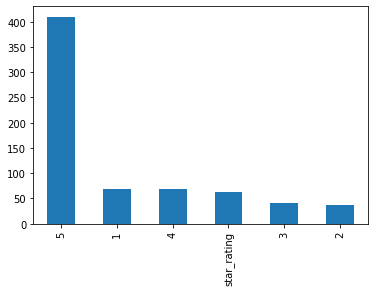

In [151]:
low_review_count.star_rating.value_counts().plot(kind='bar')

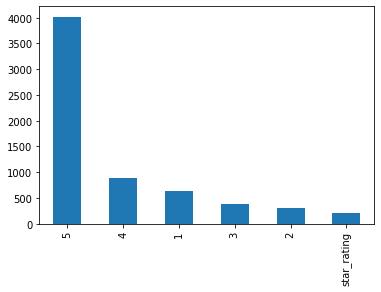

In [152]:
high_review_count.star_rating.value_counts().plot(kind='bar')

In [88]:
df_scraped_combined = pd.concat([low_review_count, high_review_count], axis=0) 
df_scraped_combined.shape

(7133, 11)

In [89]:
#What is star_rating
df_scraped_combined.star_rating.value_counts() 

5              4430
4               963
1               710
3               424
2               337
star_rating     269
Name: star_rating, dtype: int64

In [90]:
#Finds the headings, drop these rows!
df_scraped_combined[df_scraped_combined.star_rating == 'star_rating' ].head()

,ASIN,review_id,profile_name,user_url_id,review_date,star_rating,review_title,helpful_votes,total_comments,verified_purchase,review_body
10,ASIN,review_id,profile_name,user_url_id,review_date,star_rating,review_title,helpful_votes,total_comments,verified_purchase,review_body
19,ASIN,review_id,profile_name,user_url_id,review_date,star_rating,review_title,helpful_votes,total_comments,verified_purchase,review_body
30,ASIN,review_id,profile_name,user_url_id,review_date,star_rating,review_title,helpful_votes,total_comments,verified_purchase,review_body
41,ASIN,review_id,profile_name,user_url_id,review_date,star_rating,review_title,helpful_votes,total_comments,verified_purchase,review_body
52,ASIN,review_id,profile_name,user_url_id,review_date,star_rating,review_title,helpful_votes,total_comments,verified_purchase,review_body


In [91]:
df_scraped_combined = df_scraped_combined[df_scraped_combined.star_rating != 'star_rating' ]
df_scraped_combined.shape

(6864, 11)

In [169]:
df_scraped_combined

,ASIN,review_id,profile_name,user_url_id,review_date,star_rating,review_title,helpful_votes,total_comments,verified_purchase,review_body
0,B07QFFNCG4,R1IAYK4EHMWIZP,HarryB,/gp/profile/amzn1.account.AF3RYOV4DESZPEQILRXI...,"August 25, 2019",5,Excellent Camera,NaN,0,Verified Purchase,Excellent intermediate camera.Great auto expos...
1,B07QFFNCG4,R1S7BYTWFPHWCQ,IFLYMAUI,/gp/profile/amzn1.account.AFVSDBVHEO6YQLV6EUMA...,"May 5, 2019",4,"FAST, RESPONSIVE, LIGHWEIGHT AND SIMPLE",104,3,Verified Purchase,There isn't much to dislike about Canon's SL3 ...
2,B07QFFNCG4,R1Z7CIA01C9Q8T,Mikayla Hatfield,/gp/profile/amzn1.account.AFL75GRLLBS6PVADLGGW...,"June 18, 2019",5,I love it!,11,1,Verified Purchase,I am in love with this camera! Before I upgrad...
3,B07QFFNCG4,R26NAJXTSSZBUZ,xtcgrl401,/gp/profile/amzn1.account.AECRW4ZKMJ6NANUHPBWW...,"June 9, 2019",5,Nice,NaN,0,Verified Purchase,Does what it says. Very satisfied!\n
4,B07QFFNCG4,R2A9EXXPM84J7A,Ahmed Abdulameer,/gp/profile/amzn1.account.AGVVCEB5S3XYROYBEFRN...,"July 6, 2019",5,Small sturdy DSLR with 4K capability,7,0,Verified Purchase,An excellent choice for beginner/intermediate ...
5,B07QFFNCG4,R2WAEA0ZMYVSZ0,Kristina Karpew,/gp/profile/amzn1.account.AEC5QNXKWQIBRT6D4UI5...,"July 1, 2019",5,Love,NaN,0,Verified Purchase,What a great upgrade from my canon EOS t3\n
6,B07QFFNCG4,R3RO9XEAQJST4Q,Mindy,/gp/profile/amzn1.account.AGFRRU5OEVGC7O26BTTL...,"June 24, 2019",5,Starter Camera,6,0,Verified Purchase,Perfect camera for any amature photographers o...
7,B07QFFNCG4,R49OWQWMYH37H,Frangela-2,/gp/profile/amzn1.account.AEVC6NQC6XFBDISK6XAQ...,"June 20, 2019",4,Great entry level and intermediate camera.,9,0,Verified Purchase,I'm used to a Canon 5DM4 but bought this for a...
8,B07QFFNCG4,R5NZOHSK7OT00,Mohammad Yunus Naseri,/gp/profile/amzn1.account.AHDKBU3JU7ZF32O6QXZX...,"August 22, 2019",4,Odd smell,NaN,0,Verified Purchase,"I found the camera a quality one. However, as ..."
9,B07QFFNCG4,RFP5B1SNHV2FH,GenerousDad77,/gp/profile/amzn1.account.AEIWQAPD7AACI5BMWTXI...,"July 3, 2019",5,A great beginner camera,6,0,Verified Purchase,This is a great camera for all levels and you ...


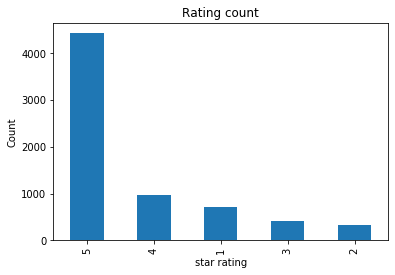

In [92]:
df_scraped_combined.star_rating.value_counts().plot(kind='bar')
plt.xlabel("star rating")
plt.ylabel('Count')
plt.title('Rating count')
plt.show()

In [175]:
df_scraped_combined.isnull().sum()

ASIN                    0
review_id               0
profile_name            1
user_url_id             0
review_date             0
star_rating             0
review_title            0
helpful_votes        1296
total_comments         14
verified_purchase     233
review_body             0
dtype: int64